In [1]:
import numpy as np
import pandas as pd
from openpyxl import load_workbook
import matplotlib
from matplotlib import pylab as plt 
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
wb = load_workbook('data/Pedi_NSQIP_Master_Plastics_Luke.xlsx')
print(wb.sheetnames)

['Pediatric NSQIP Master CSV - On']


In [65]:
ws = wb['Pediatric NSQIP Master CSV - On']
data = pd.DataFrame(ws.values)
renamed_columns = data.rename(columns=data.iloc[0])
df = renamed_columns.drop(index=0)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.head(5))

  CASEID     SEX                       RACE ETHNICITY_HISPANIC  \
1     NA  Female       Unknown/Not Reported                 NA   
2     NA  Female  Black or African American                 No   
3     NA  Female                      White                 No   
4     NA  Female                      White                 No   
5     NA  Female                      White                 No   

                 PRNCPTX    CPT PROCEDURE_CATEGORY WORKRVU       INOUT  \
1  REDUCTION MAMMAPLASTY  19318             Breast   16.03  Outpatient   
2  REDUCTION MAMMAPLASTY  19318             Breast   16.03  Outpatient   
3  REDUCTION MAMMAPLASTY  19318             Breast   16.03  Outpatient   
4  REDUCTION MAMMAPLASTY  19318             Breast   16.03   Inpatient   
5  REDUCTION MAMMAPLASTY  19318             Breast   16.03   Inpatient   

                                      TRANST AGE_DAYS ADMYR OPERYR DISCHDEST  \
1  Admitted from home/clinic/doctor's office     5760  2019   2019      Home  

In [66]:
df = df.replace({'NA':np.nan})
df = df.replace({-99:np.nan})
df = df.replace(['ASA 1 ñ Normal/Healthy', 'ASA 4 ñ Severe Systemic Disease Threat', 
                 'ASA 4 - Life Threat', 'ASA 3 - Severe Disturb', 'ASA 2 ñ Mild Systemic Disease', 
                 'ASA 2 - Mild Disturb', 'None assigned', 'ASA not assigned', 
                 'ASA 1 - No Disturb', 'ASA 5 - Moribund', 'ASA 3 ñ Severe Systemic Disease'],
                ['ASA 1 – Normal/Healthy','ASA 4 – Severe Systemic Disease Threat',
                 'ASA 4 – Severe Systemic Disease Threat','ASA 3 – Severe Systemic Disease','ASA 2 – Mild Systemic Disease',
                 'ASA 2 – Mild Systemic Disease','ASA Not Assigned','ASA Not Assigned',
                 'ASA 1 – Normal/Healthy','ASA 5 – Moribund','ASA 3 – Severe Systemic Disease'])


In [5]:
print(df.shape)
print(df.head())

(55432, 370)
   CASEID     SEX                       RACE ETHNICITY_HISPANIC  \
1     NaN  Female       Unknown/Not Reported                NaN   
2     NaN  Female  Black or African American                 No   
3     NaN  Female                      White                 No   
4     NaN  Female                      White                 No   
5     NaN  Female                      White                 No   

                 PRNCPTX    CPT PROCEDURE_CATEGORY  WORKRVU       INOUT  \
1  REDUCTION MAMMAPLASTY  19318             Breast    16.03  Outpatient   
2  REDUCTION MAMMAPLASTY  19318             Breast    16.03  Outpatient   
3  REDUCTION MAMMAPLASTY  19318             Breast    16.03  Outpatient   
4  REDUCTION MAMMAPLASTY  19318             Breast    16.03   Inpatient   
5  REDUCTION MAMMAPLASTY  19318             Breast    16.03   Inpatient   

                                      TRANST  AGE_DAYS  ADMYR  OPERYR  \
1  Admitted from home/clinic/doctor's office      5760   201

In [6]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55432 entries, 1 to 55432
Data columns (total 370 columns):
 #    Column                  Non-Null Count  Dtype  
---   ------                  --------------  -----  
 0    CASEID                  16974 non-null  float64
 1    SEX                     55432 non-null  object 
 2    RACE                    55423 non-null  object 
 3    ETHNICITY_HISPANIC      49986 non-null  object 
 4    PRNCPTX                 55432 non-null  object 
 5    CPT                     55432 non-null  int64  
 6    PROCEDURE_CATEGORY      55432 non-null  object 
 7    WORKRVU                 55432 non-null  float64
 8    INOUT                   55432 non-null  object 
 9    TRANST                  55432 non-null  object 
 10   AGE_DAYS                55432 non-null  int64  
 11   ADMYR                   55432 non-null  int64  
 12   OPERYR                  55432 non-null  int64  
 13   DISCHDEST               55349 non-null  object 
 14   ANESTECH            

In [67]:
# df_test = df.dropna(axis=1, how='all')
# dropped_columns = np.setdiff1d(df.columns,df_test.columns)
# print(df_test.shape)

# df = df.dropna(axis=1, how='all')
# print(df.shape)

perc = 20.0 # Like N %
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, thresh=min_count)
print(df.shape)

(55432, 104)


In [8]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55432 entries, 1 to 55432
Data columns (total 104 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    SEX                 55432 non-null  object 
 1    RACE                55423 non-null  object 
 2    ETHNICITY_HISPANIC  49986 non-null  object 
 3    PRNCPTX             55432 non-null  object 
 4    CPT                 55432 non-null  int64  
 5    PROCEDURE_CATEGORY  55432 non-null  object 
 6    WORKRVU             55432 non-null  float64
 7    INOUT               55432 non-null  object 
 8    TRANST              55432 non-null  object 
 9    AGE_DAYS            55432 non-null  int64  
 10   ADMYR               55432 non-null  int64  
 11   OPERYR              55432 non-null  int64  
 12   DISCHDEST           55349 non-null  object 
 13   ANESTECH            51340 non-null  object 
 14   SURGSPEC            55432 non-null  object 
 15   HEIGHT              50562 non-null

In [68]:
duplicate_features = ['SUPINFEC','WNDINFD','ORGSPCSSI','DEHIS','OUPNEUMO','REINTUB',
                      'RENAINSF','OPRENAFL','URNINFEC','CNSCOMA','CNSCVA','CSZRE','NEURODEF',
                      'CIVHG1','CIVHG2','CIVHG3','CIVHG4','CIVHUNK','CDARREST','OTHBLEED',
                      'OTHVT','OTHSYSEP','OTHCLAB']
df = df.drop(duplicate_features, axis=1)
print(df.shape)

continuous_features = ['AGE_DAYS','HEIGHT','WEIGHT','ANESURG','SURGANE',
                                    'DPATRM','ANETIME','OPTIME']
ordinal_features = ['CRF','IVH_GRADE','PRSEPIS','WNDCLAS','ASACLAS']
categorical_features = np.setdiff1d(df.columns, (ordinal_features + continuous_features))

for feature in categorical_features:
    print(feature, df[feature].unique())
    print('')
    print('')

(55432, 81)
ACQ_ABNORMALITY ['No' 'Yes']


ADMYR [2019 2015 2012 2013 2014 2016 2017 2018 2020 2011]


ANESTECH ['General' nan 'Spinal' 'Other' 'Epidural' 'Regional' 'Local' 'Caudal'
 'Unknown']


ASTHMA ['No' 'Yes']


CASETYPE ['Elective' 'Urgent' 'Emergent']


CEREBRAL_PALSY ['No' 'Yes']


CONG_MALFORM ['No'
 'Yes, Neonate >=1500 grams at the time of surgery or infant/child/teenager with a history of a congenital defect at the time of surgery'
 'Yes, Neonate < 1500 grams at the time of surgery']


CPR_PRIOR_SURG ['No' 'Yes']


CPT [19318 19316 19361 19357 19340 19300 40700 42200 40701 42226 42225 42220
 42215 42210 42205 40761 40720 40702 30462 30460 42950 42810 42815 42235
 26580 21147 21146 61559 21175 61557 61550 61558 61556 14040 15240 21230
 11450 20970 20969 15757 15100 15758 15756 15738 15736 15734 15733 15260
 15220 15200 15120 11960 26550 26587 26562 26561 26055 26560 28345 44120
 49605 69930 69641 69610 62230 61510 54344 54324 53450 50727 47562 44640
 44210 43520 42310 4101

In [ ]:
df_2 = df

In [80]:
# df_2 = df.replace({'missing':np.nan})
# df_2 = df['ANESTECH'].replace({np.nan:'missing'})
df_copy = df
df = df.replace(to_replace = np.nan, value='missing')

for feature in categorical_features:
    # print(feature, df[feature].isna().sum())
    value_list = list(df[feature].unique())
    print(feature, value_list)
    for value in value_list:
        if value is np.nan:
            print(feature, df[feature].isna().sum())
            print(df[feature].unique())
            # print(feature)

ACQ_ABNORMALITY ['No', 'Yes']
ADMYR [2019, 2015, 2012, 2013, 2014, 2016, 2017, 2018, 2020, 2011]
ANESTECH ['General', 'missing', 'Spinal', 'Other', 'Epidural', 'Regional', 'Local', 'Caudal', 'Unknown']
ASTHMA ['No', 'Yes']
CASETYPE ['Elective', 'Urgent', 'Emergent']
CEREBRAL_PALSY ['No', 'Yes']
CONG_MALFORM ['No', 'Yes, Neonate >=1500 grams at the time of surgery or infant/child/teenager with a history of a congenital defect at the time of surgery', 'Yes, Neonate < 1500 grams at the time of surgery']
CPR_PRIOR_SURG ['No', 'Yes']
CPT [19318, 19316, 19361, 19357, 19340, 19300, 40700, 42200, 40701, 42226, 42225, 42220, 42215, 42210, 42205, 40761, 40720, 40702, 30462, 30460, 42950, 42810, 42815, 42235, 26580, 21147, 21146, 61559, 21175, 61557, 61550, 61558, 61556, 14040, 15240, 21230, 11450, 20970, 20969, 15757, 15100, 15758, 15756, 15738, 15736, 15734, 15733, 15260, 15220, 15200, 15120, 11960, 26550, 26587, 26562, 26561, 26055, 26560, 28345, 44120, 49605, 69930, 69641, 69610, 62230, 61510

In [85]:
# TYPE CAST CATEGORICALFEATURES TO STRINGS
for feature in categorical_features:
    df[feature] = df[feature].astype(str)
    new_value_list = list(df[feature].unique())
    print(feature, new_value_list)



ACQ_ABNORMALITY ['No', 'Yes']
ADMYR ['2019', '2015', '2012', '2013', '2014', '2016', '2017', '2018', '2020', '2011']
ANESTECH ['General', 'missing', 'Spinal', 'Other', 'Epidural', 'Regional', 'Local', 'Caudal', 'Unknown']
ASTHMA ['No', 'Yes']
CASETYPE ['Elective', 'Urgent', 'Emergent']
CEREBRAL_PALSY ['No', 'Yes']
CONG_MALFORM ['No', 'Yes, Neonate >=1500 grams at the time of surgery or infant/child/teenager with a history of a congenital defect at the time of surgery', 'Yes, Neonate < 1500 grams at the time of surgery']
CPR_PRIOR_SURG ['No', 'Yes']
CPT ['19318', '19316', '19361', '19357', '19340', '19300', '40700', '42200', '40701', '42226', '42225', '42220', '42215', '42210', '42205', '40761', '40720', '40702', '30462', '30460', '42950', '42810', '42815', '42235', '26580', '21147', '21146', '61559', '21175', '61557', '61550', '61558', '61556', '14040', '15240', '21230', '11450', '20970', '20969', '15757', '15100', '15758', '15756', '15738', '15736', '15734', '15733', '15260', '15220',

In [86]:
# TYPE CAST ORDINAL FEATURES TO STRINGS
for feature in ordinal_features:
    df[feature] = df[feature].astype(str)
    new_value_list = list(df[feature].unique())
    print(feature, new_value_list)

CRF ['No cardiac risk factors', 'Minor cardiac risk factors', 'Major cardiac risk factors', 'Severe cardiac risk factors']
IVH_GRADE ['No IVH reported', 'Grade 4', 'Grade 3', 'Grade 1', 'IVH reported but no grade assigned', 'Grade 2']
PRSEPIS ['None', 'Septic Shock', 'SIRS', 'Sepsis']
WNDCLAS ['Clean', 'Clean/Contaminated', 'Contaminated', 'Dirty/Infected']
ASACLAS ['ASA 3 – Severe Systemic Disease', 'ASA 2 – Mild Systemic Disease', 'ASA 1 – Normal/Healthy', 'ASA Not Assigned', 'ASA 4 – Severe Systemic Disease Threat', 'ASA 5 – Moribund']


In [92]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

for feature in continuous_features:
    # print(feature, df[feature].isna().sum())
    value_list = list(df[feature].unique())
    # print(feature, value_list)
    for value in value_list:
        if value=='missing':
            print(feature)
            # print(df[feature].unique())

HEIGHT
WEIGHT
ANESURG
SURGANE
DPATRM
ANETIME
OPTIME


In [96]:
print(continuous_features)
# for feature in continuous_features:
#     print(df[df[feature]=='missing'].count())

['AGE_DAYS', 'HEIGHT', 'WEIGHT', 'ANESURG', 'SURGANE', 'DPATRM', 'ANETIME', 'OPTIME']


In [97]:
df_drop_cont = df.drop(columns=['HEIGHT', 'WEIGHT', 'ANESURG', 'SURGANE', 'DPATRM', 'ANETIME', 'OPTIME'], axis=1)

      SEX                       RACE ETHNICITY_HISPANIC  \
1  Female       Unknown/Not Reported            missing   
2  Female  Black or African American                 No   
3  Female                      White                 No   
4  Female                      White                 No   
5  Female                      White                 No   

                 PRNCPTX    CPT PROCEDURE_CATEGORY WORKRVU       INOUT  \
1  REDUCTION MAMMAPLASTY  19318             Breast   16.03  Outpatient   
2  REDUCTION MAMMAPLASTY  19318             Breast   16.03  Outpatient   
3  REDUCTION MAMMAPLASTY  19318             Breast   16.03  Outpatient   
4  REDUCTION MAMMAPLASTY  19318             Breast   16.03   Inpatient   
5  REDUCTION MAMMAPLASTY  19318             Breast   16.03   Inpatient   

                                      TRANST  AGE_DAYS ADMYR OPERYR DISCHDEST  \
1  Admitted from home/clinic/doctor's office      5760  2019   2019      Home   
2  Admitted from home/clinic/doctor's 

In [ ]:
# https://datatofish.com/count-nan-pandas-dataframe/

In [58]:
# https://thispointer.com/pandas-drop-dataframe-columns-based-on-nan-percentage/

In [10]:
# TARGET VARIABLE -- WOUND INFECTIONS -- COLUMN 61 
print(df['WNDINF'].value_counts())

No     54625
Yes      807
Name: WNDINF, dtype: int64


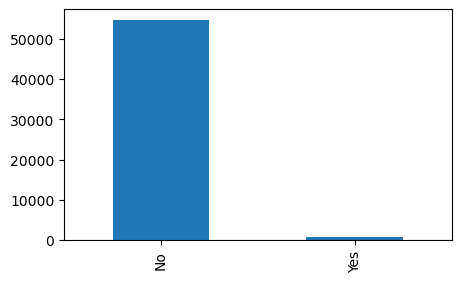

In [172]:
# TARGET VARIABLE DISTRIBUTION
plt.rcParams["figure.figsize"] = (5,3)
pp = PdfPages('figures/categorical_features/categorical_plots(1).pdf')
pd.value_counts(df['WNDINF']).plot.bar()
pp.savefig(plt.gcf())

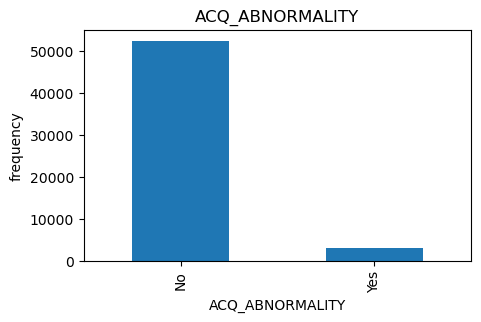

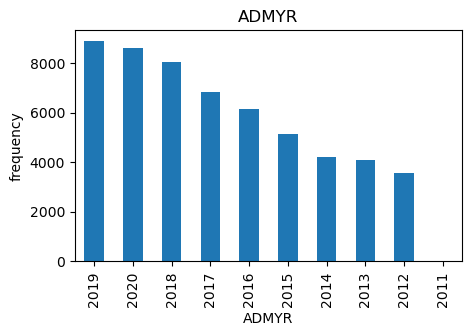

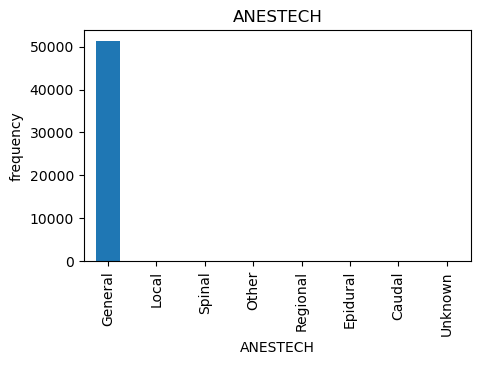

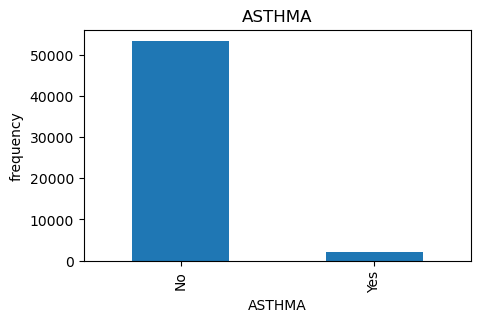

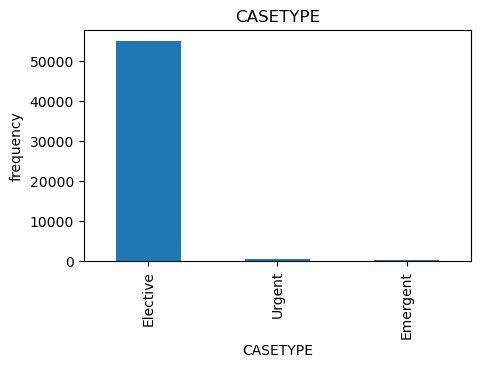

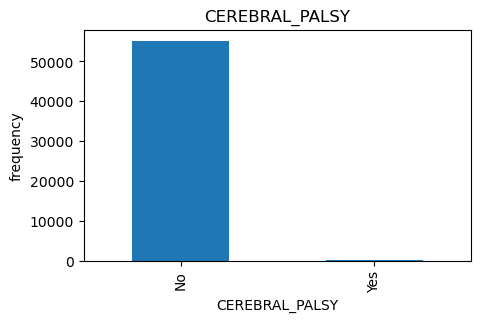

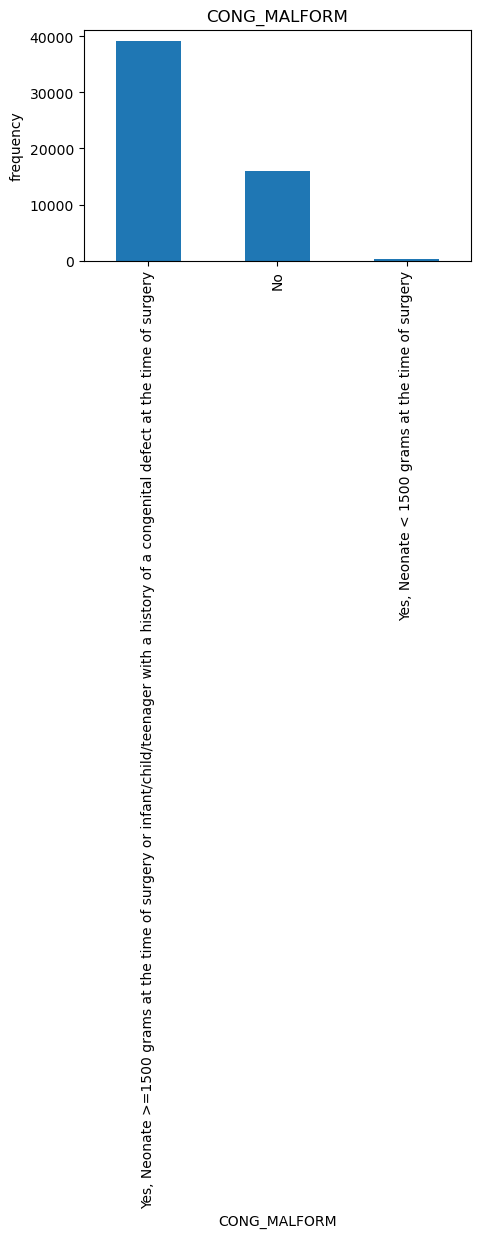

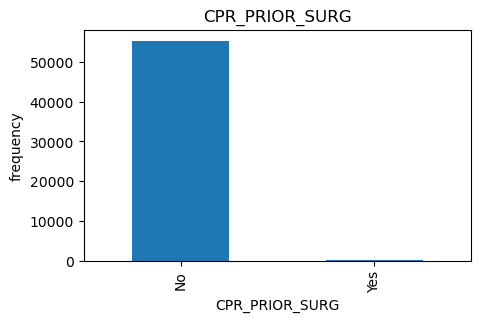

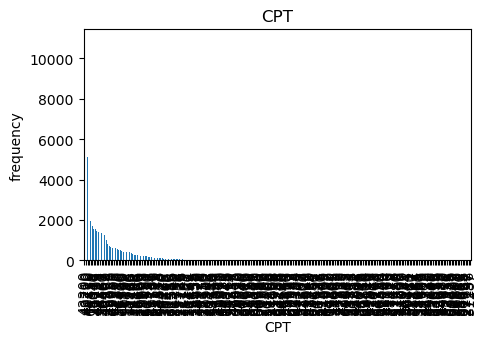

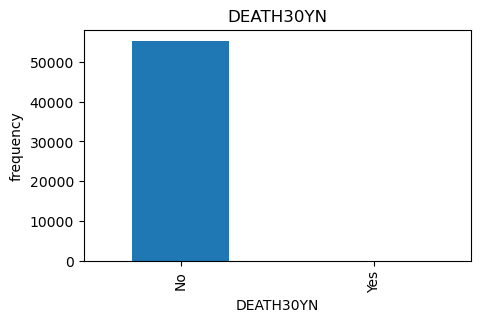

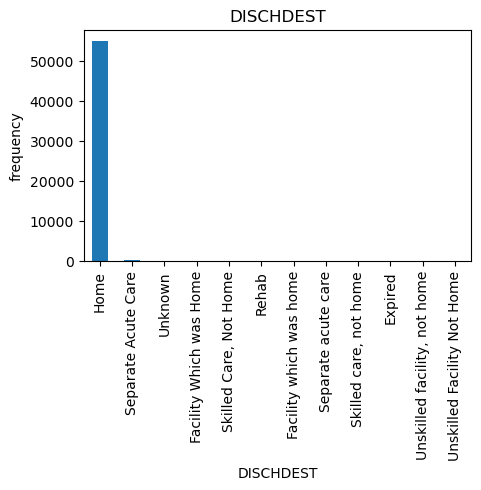

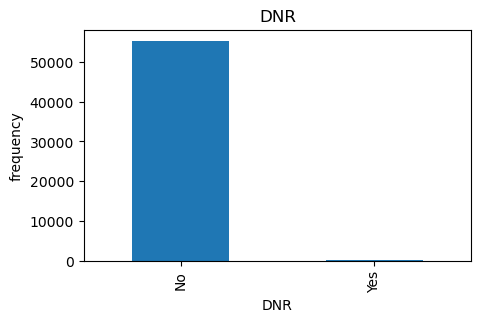

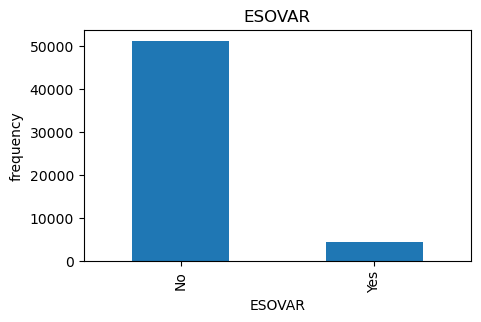

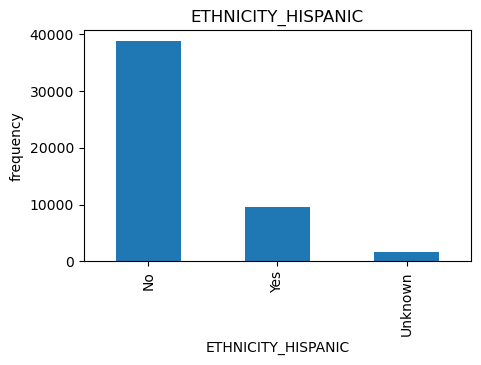

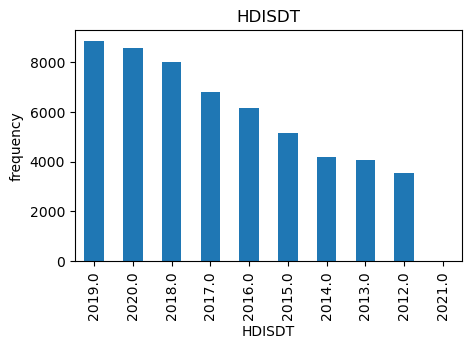

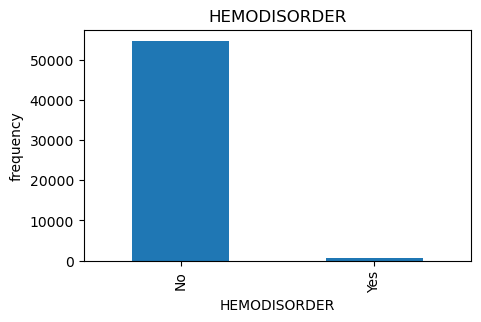

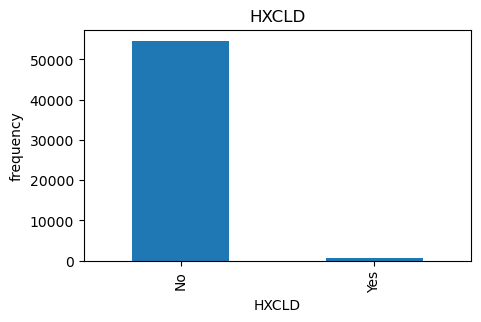

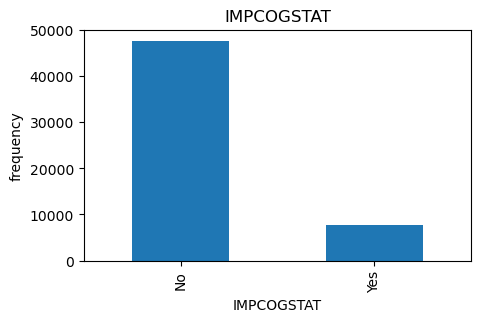

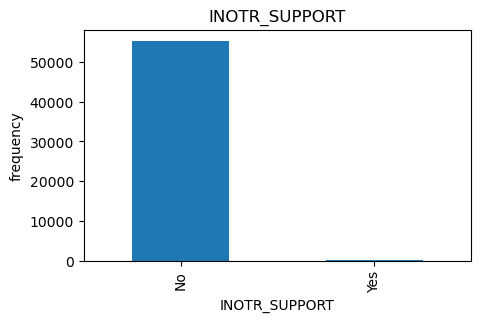

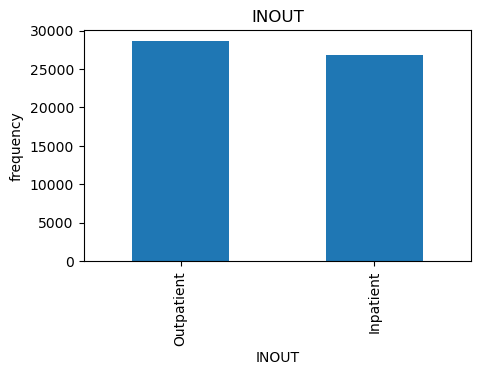

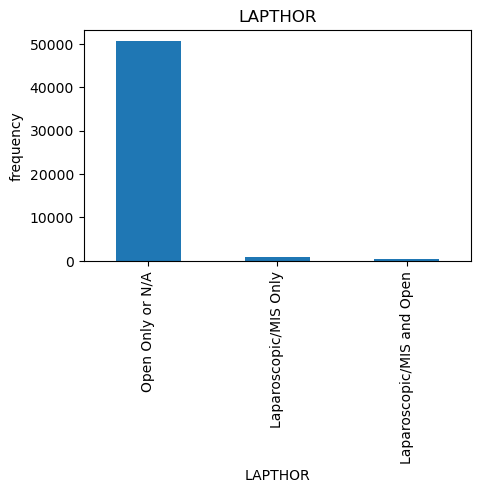

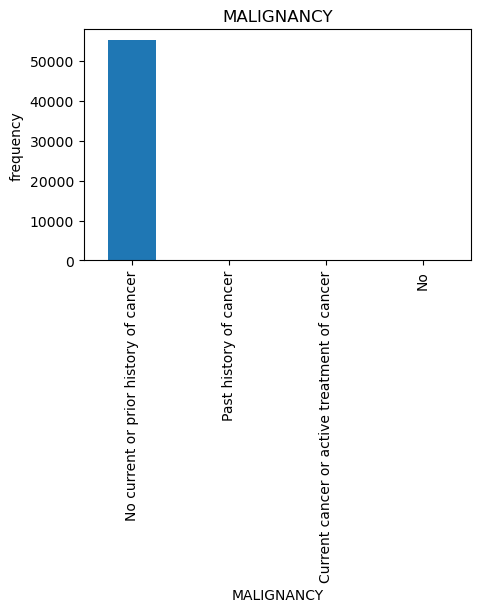

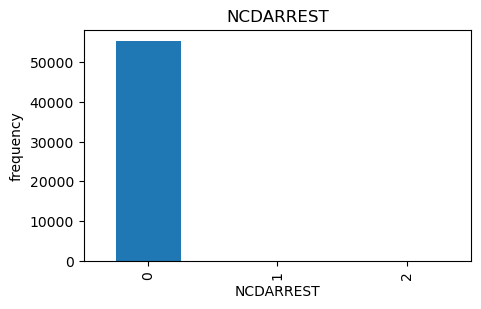

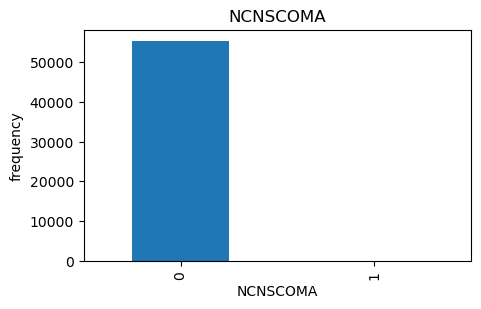

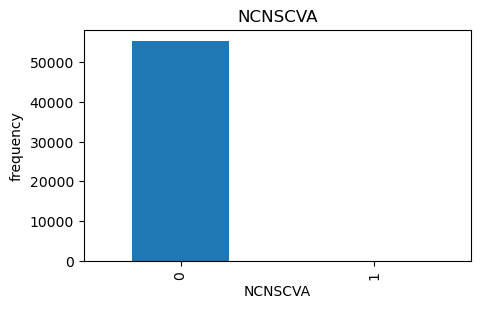

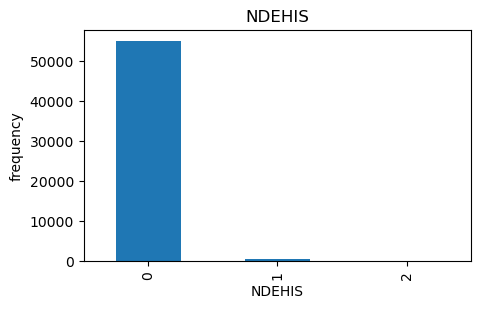

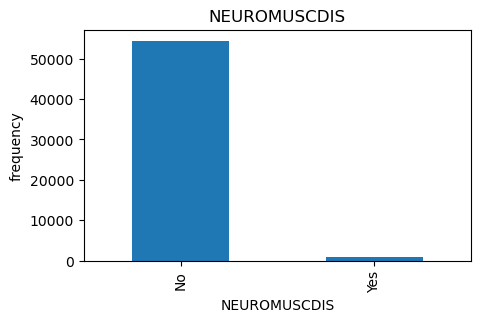

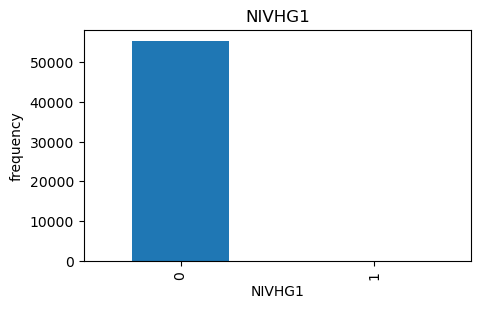

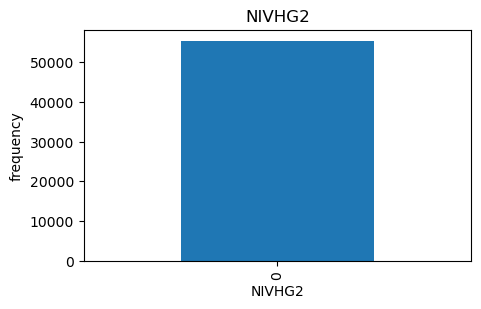

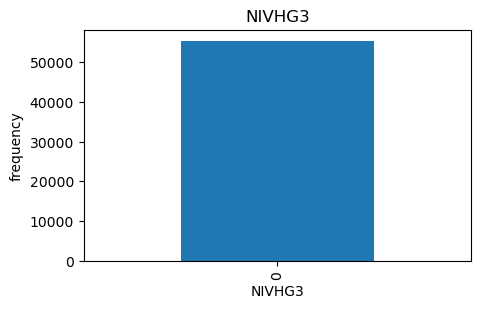

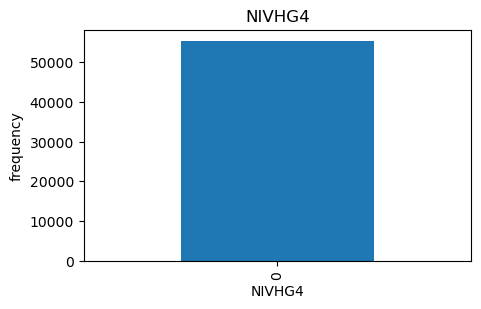

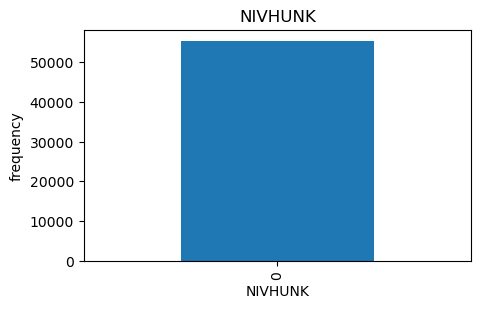

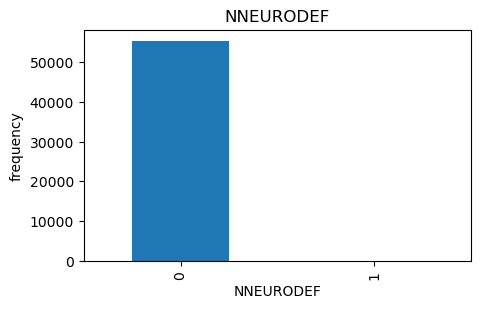

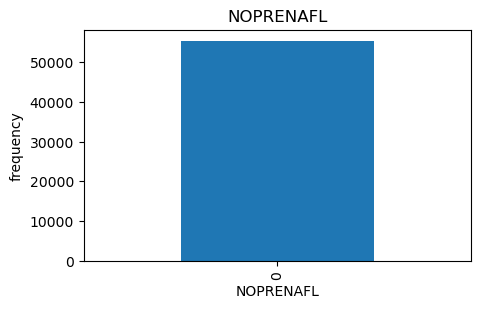

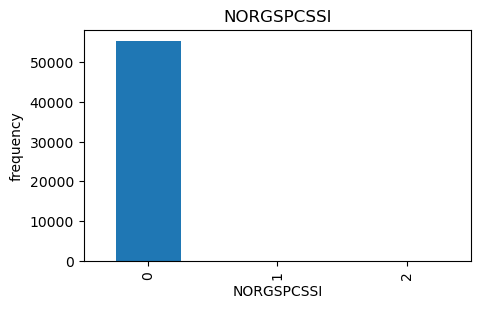

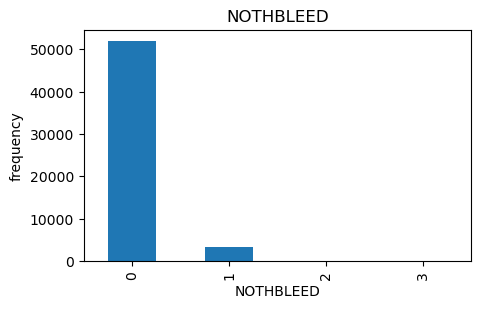

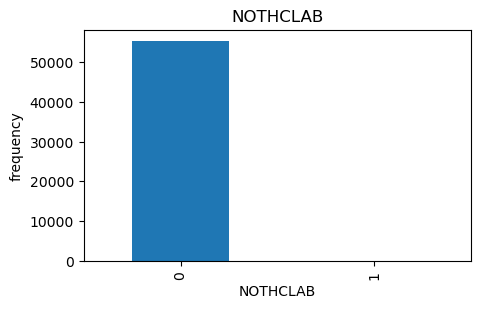

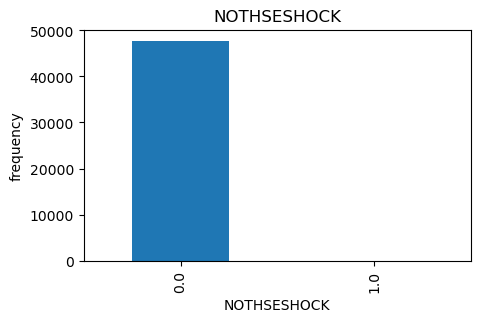

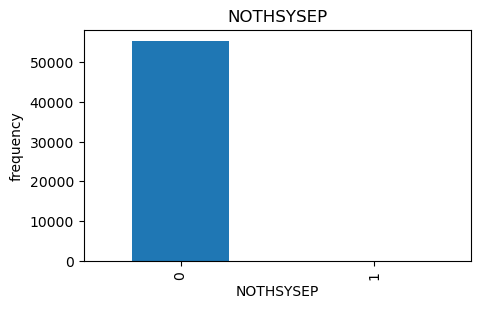

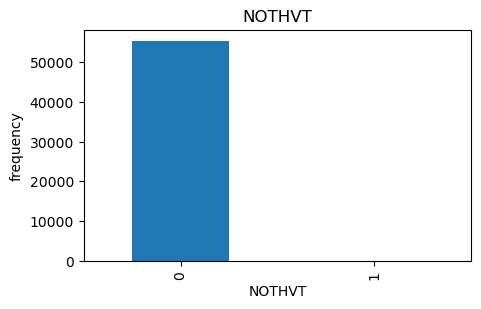

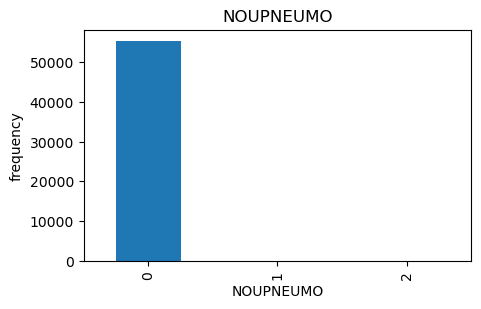

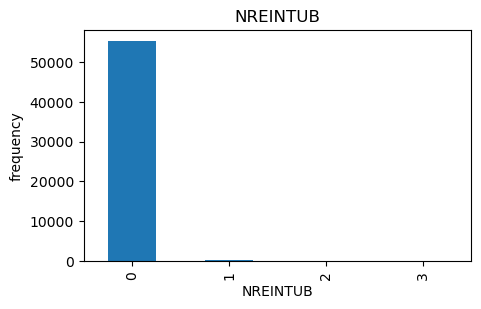

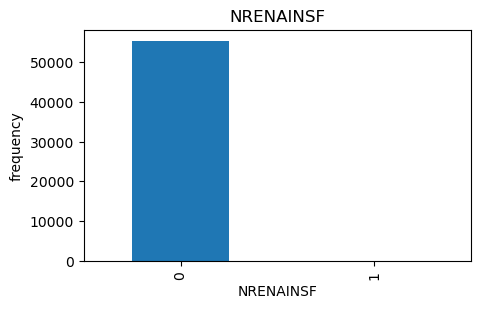

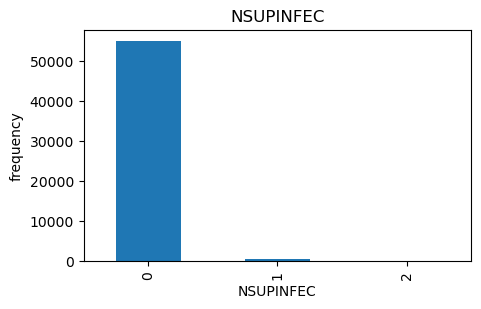

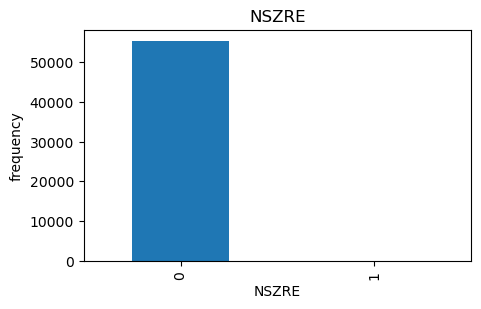

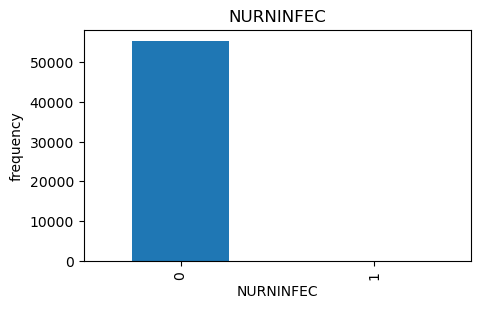

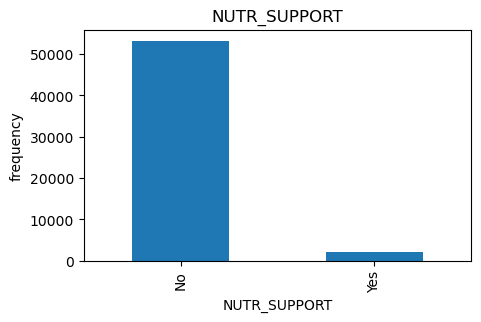

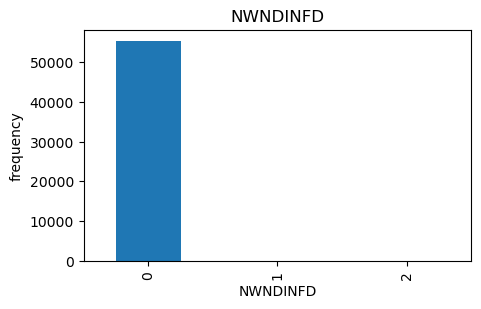

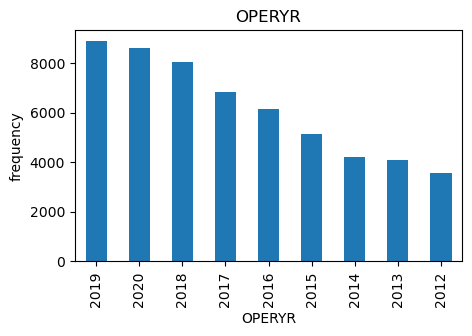

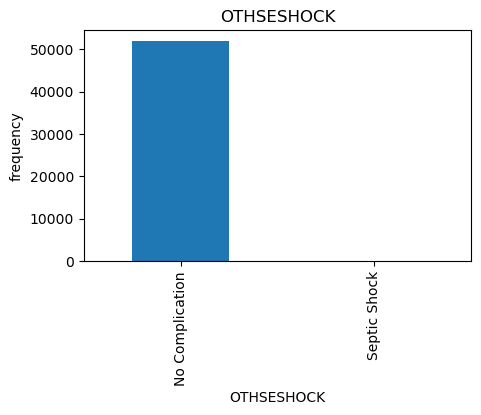

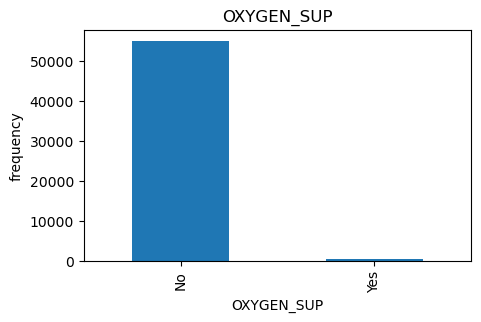

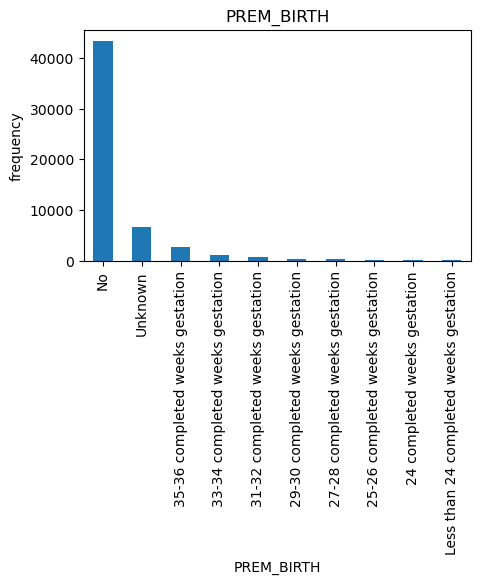

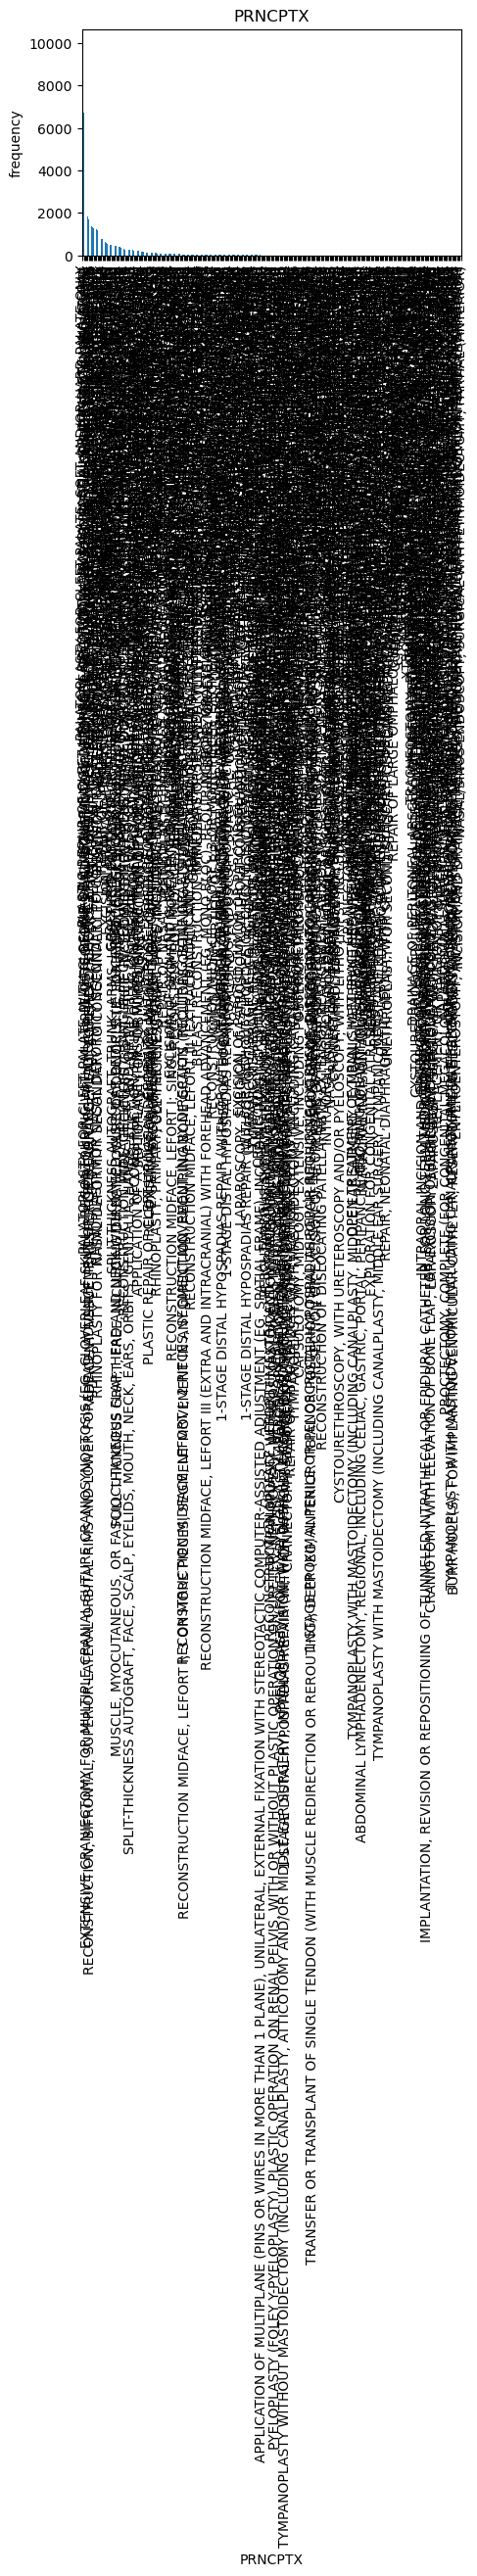

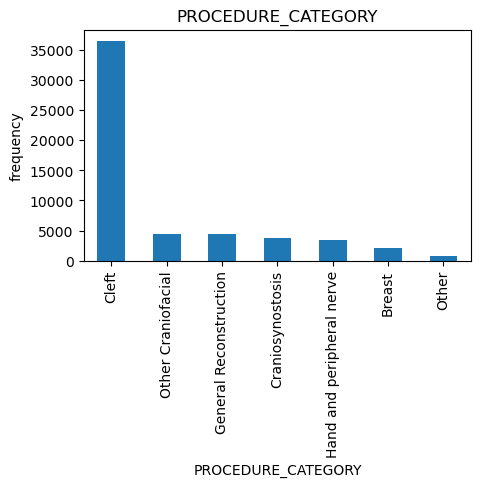

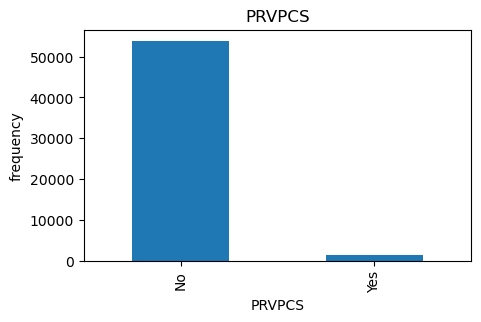

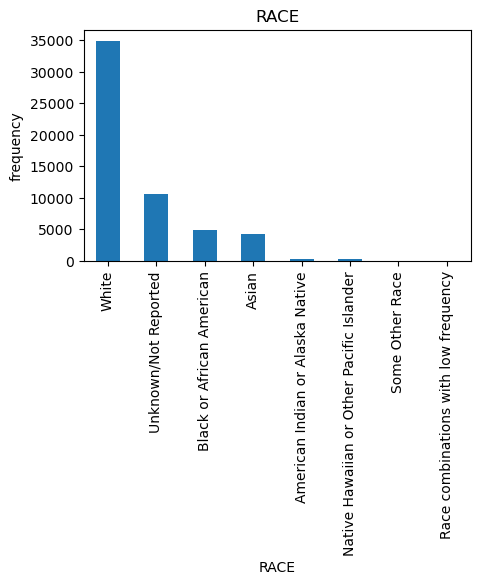

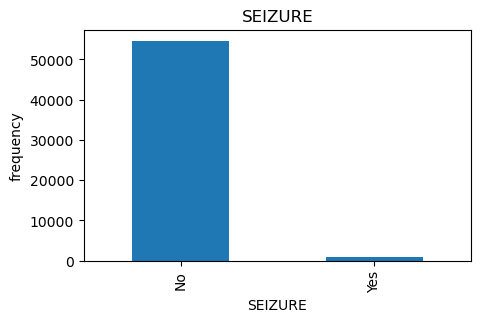

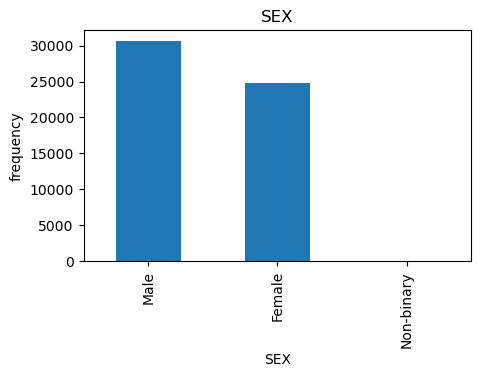

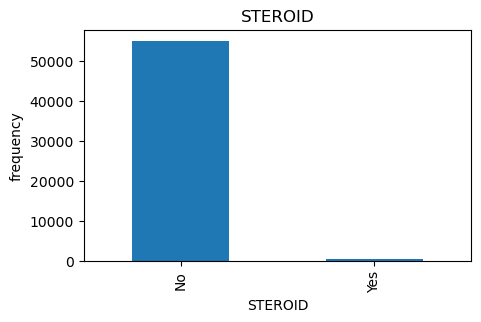

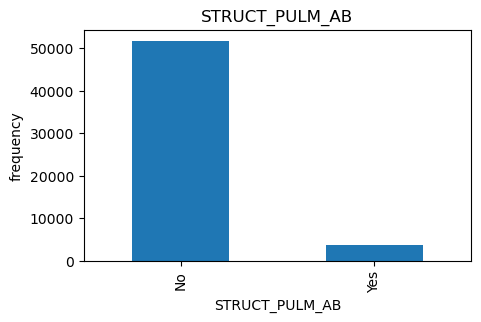

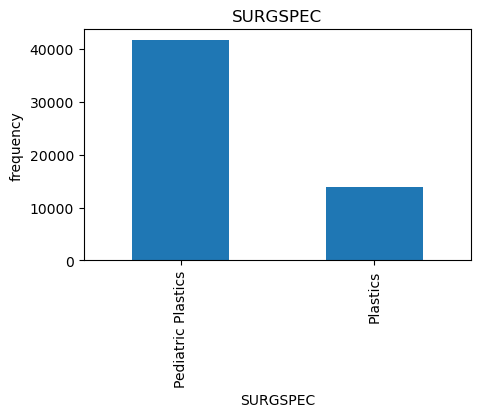

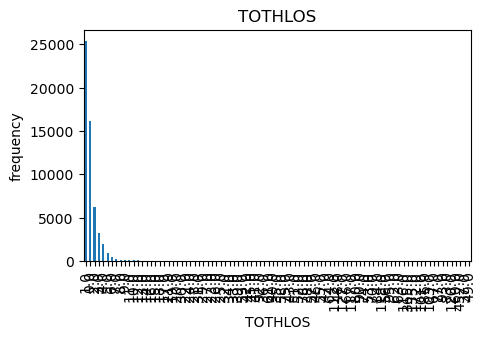

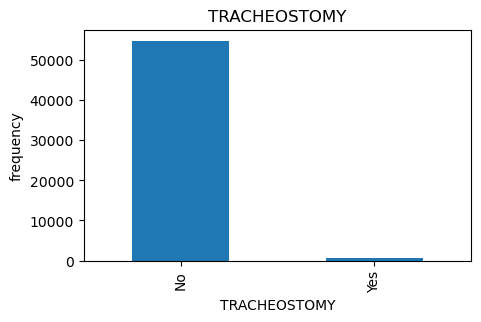

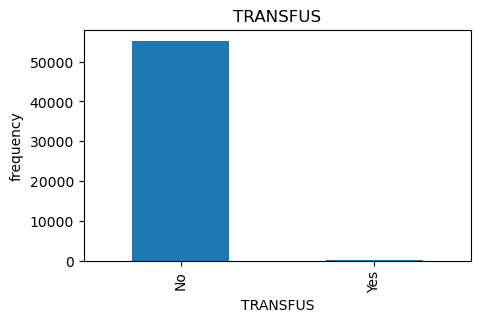

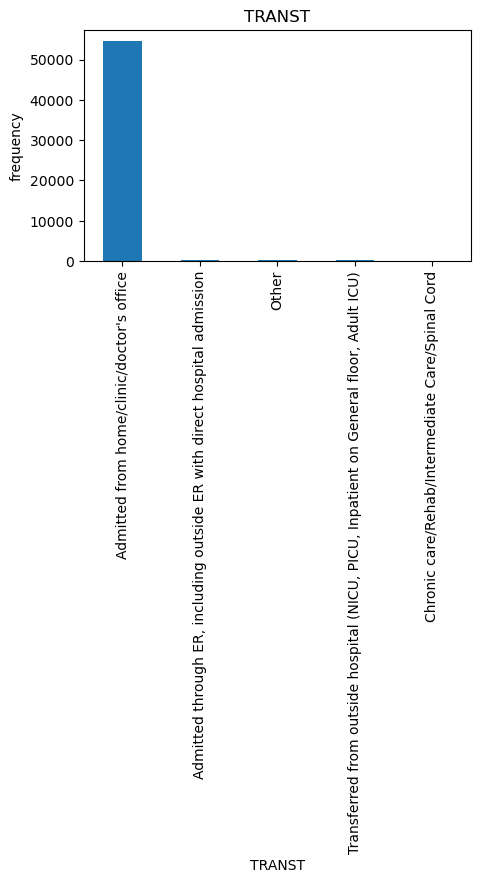

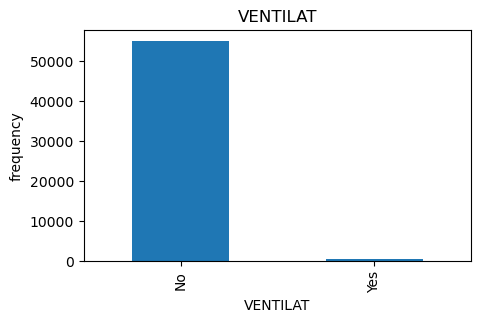

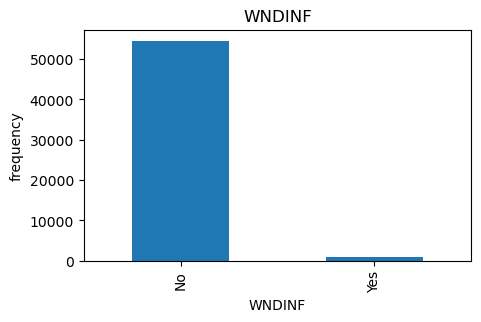

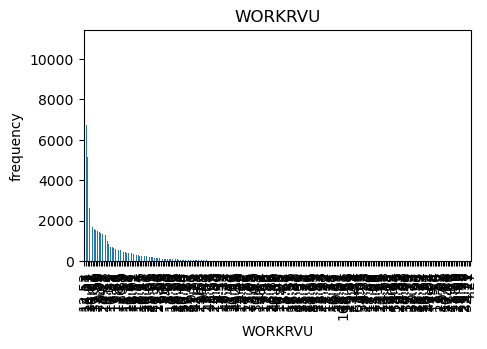

In [173]:
pp = PdfPages('figures/categorical_features/categorical_plots.pdf')
for feature in categorical_features:
    pd.value_counts(df[feature]).plot.bar()
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.title(feature)
    pp.savefig(plt.gcf())
    plt.show()

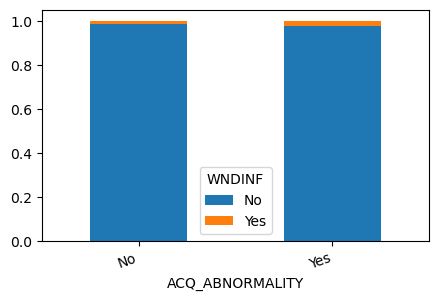

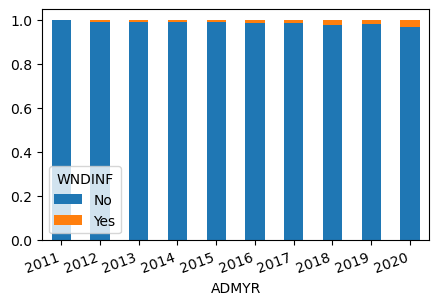

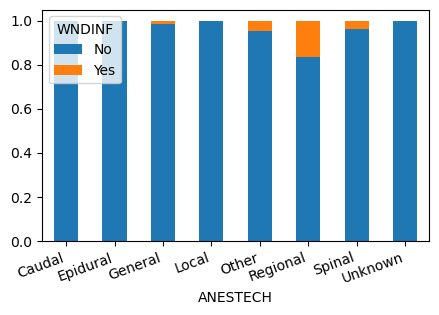

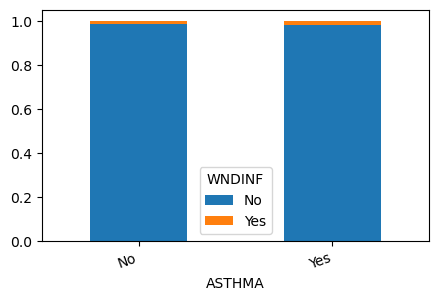

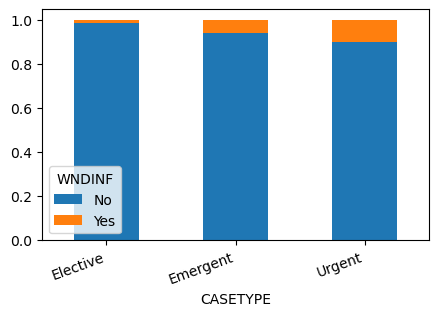

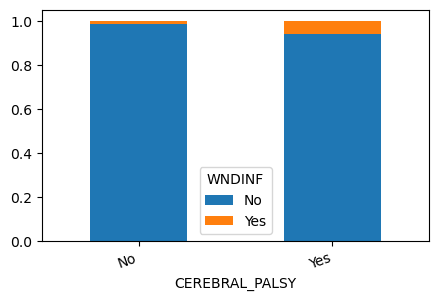

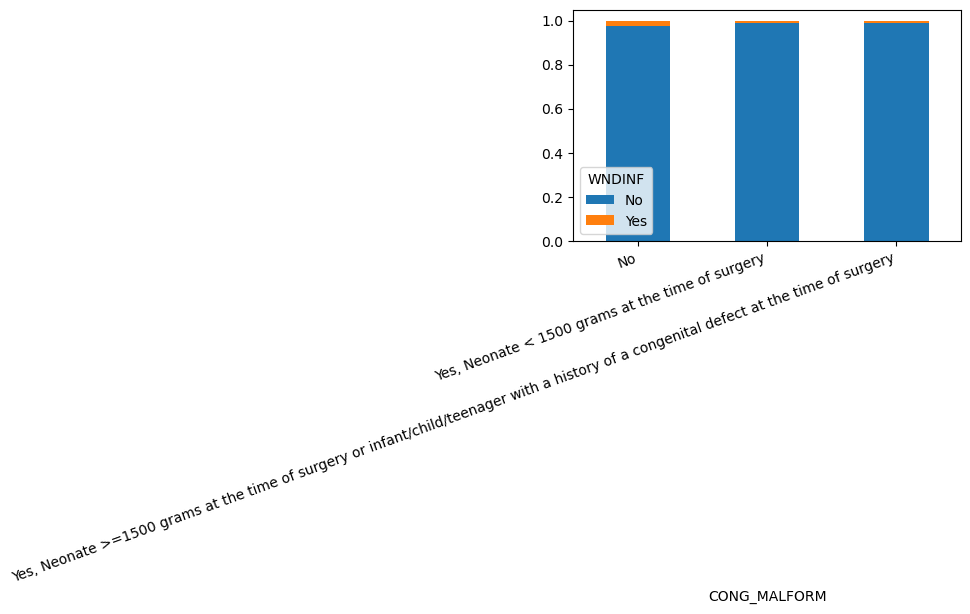

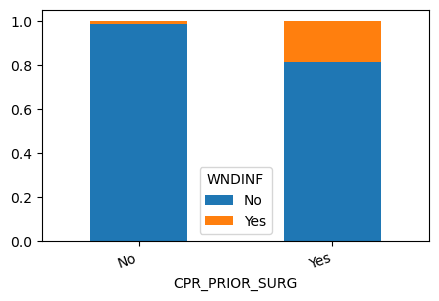

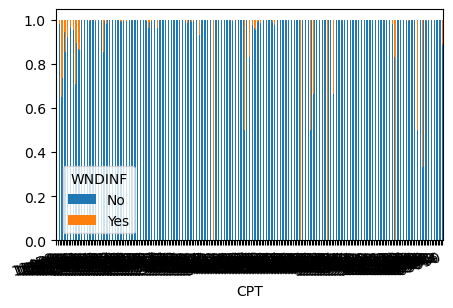

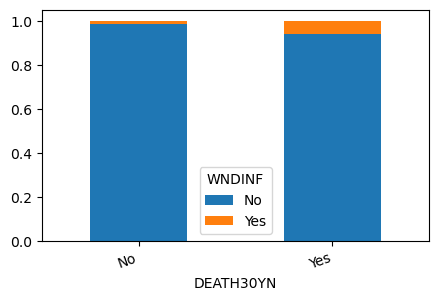

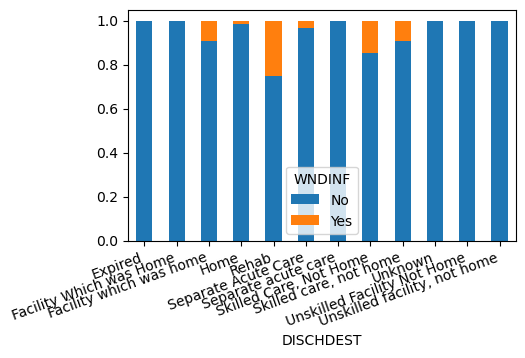

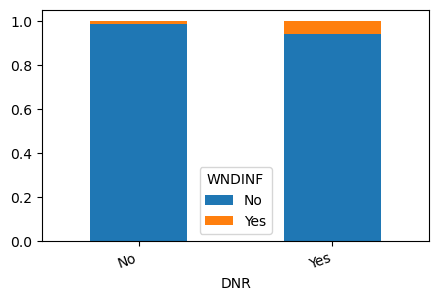

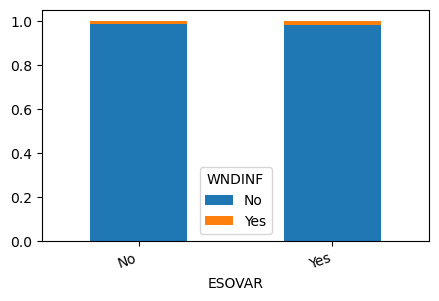

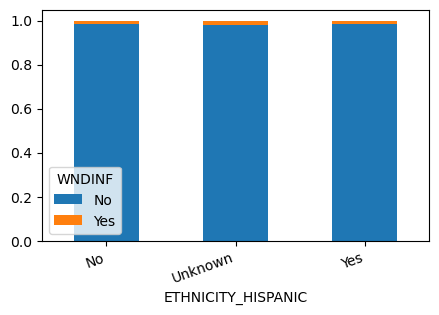

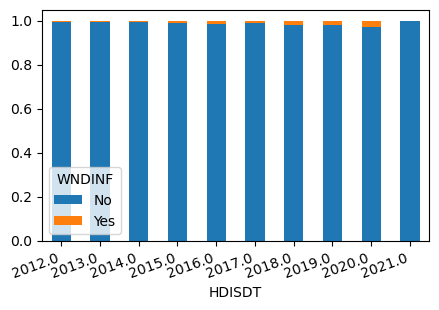

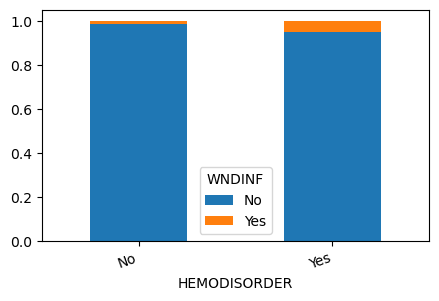

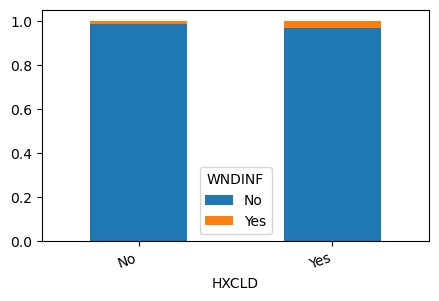

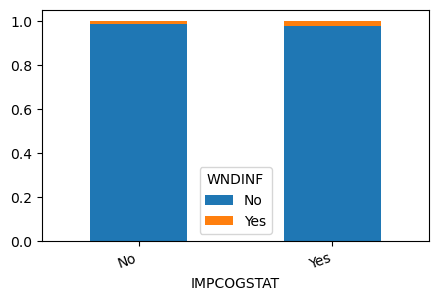

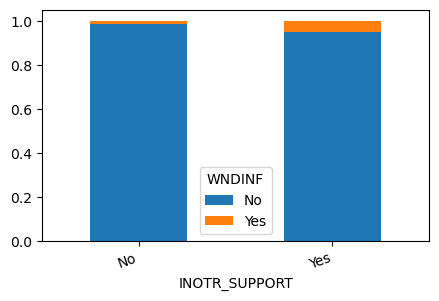

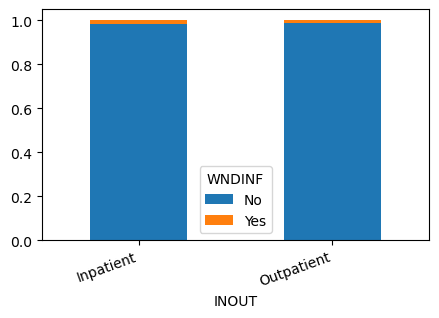

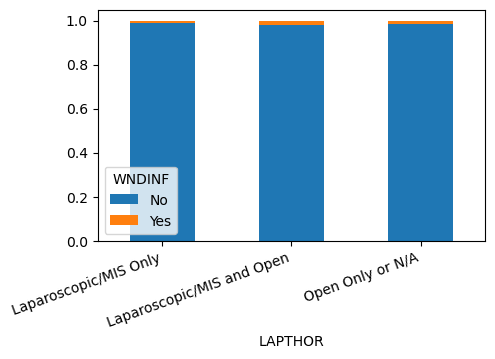

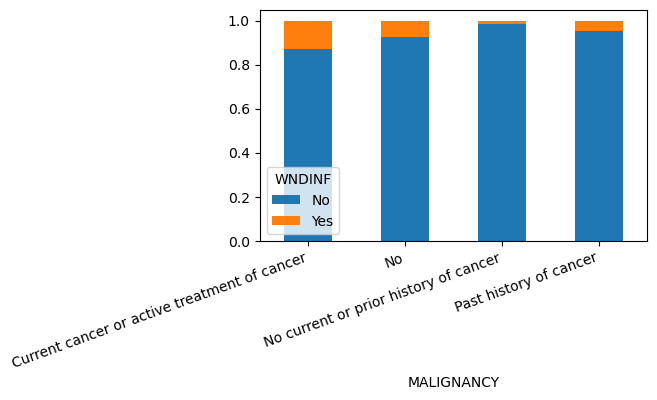

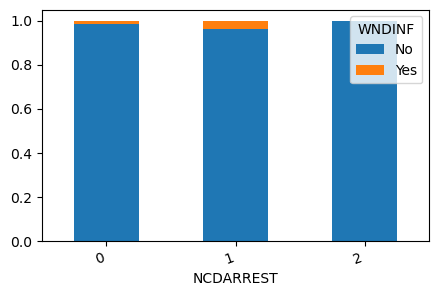

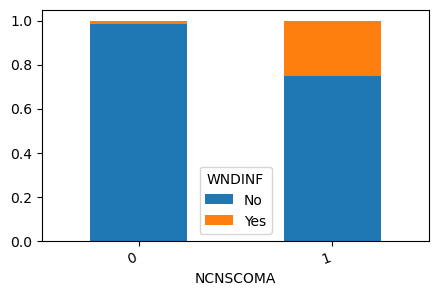

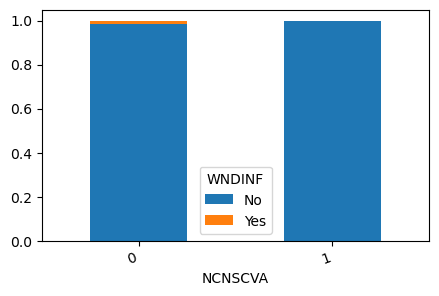

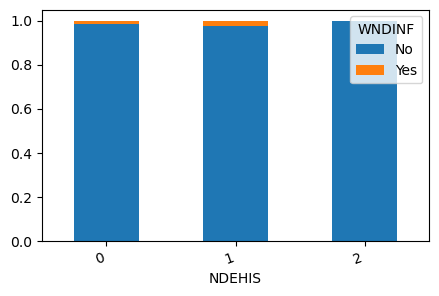

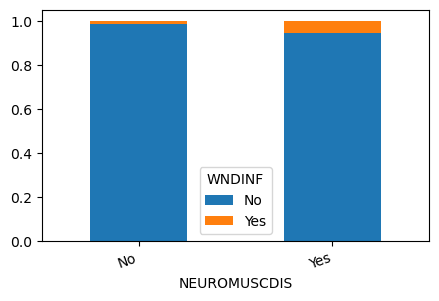

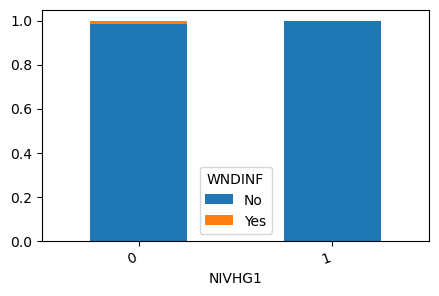

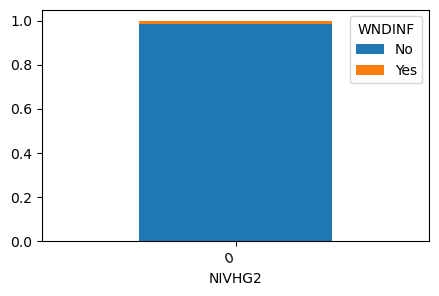

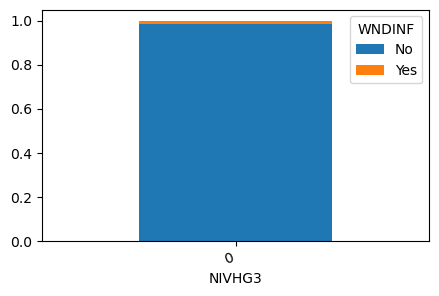

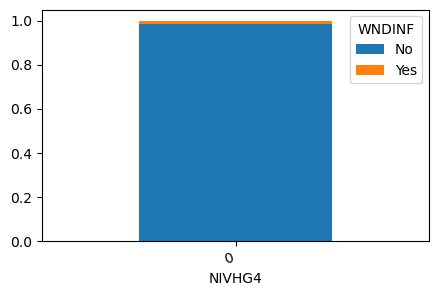

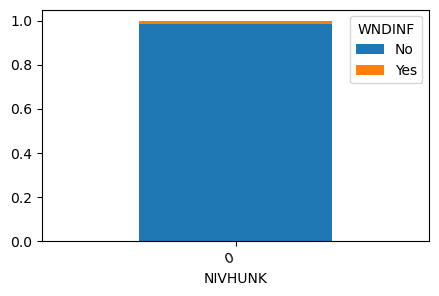

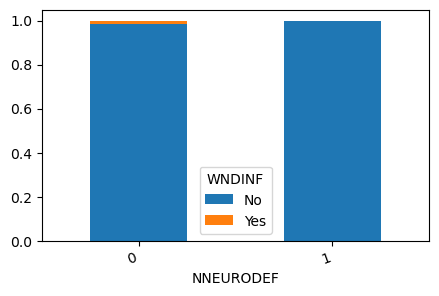

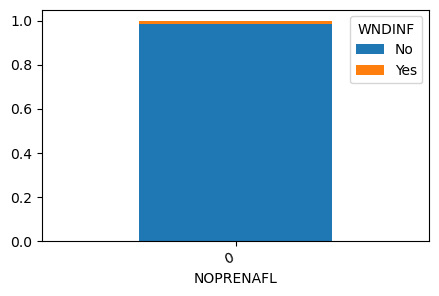

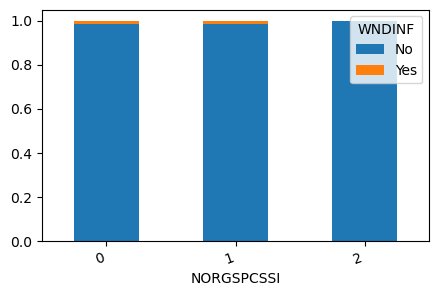

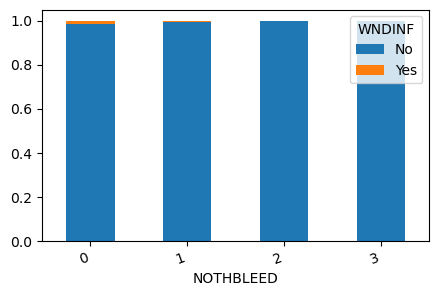

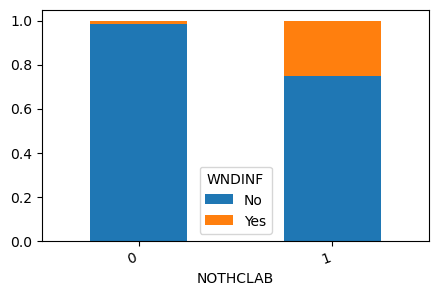

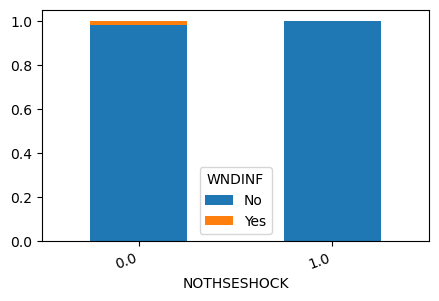

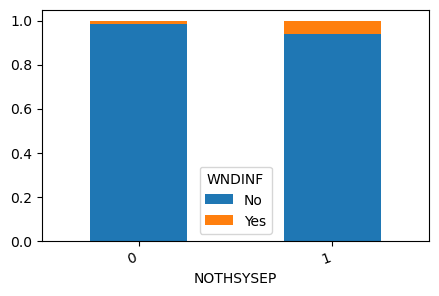

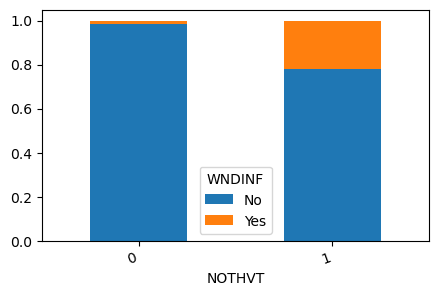

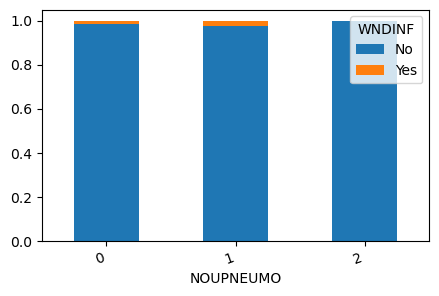

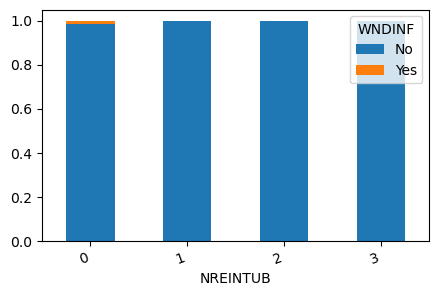

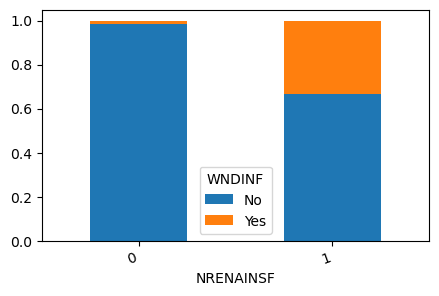

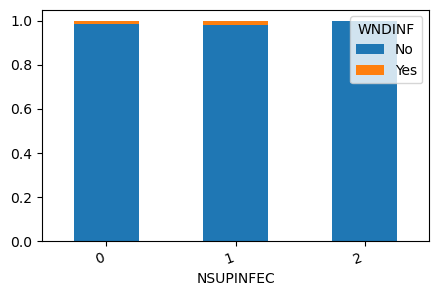

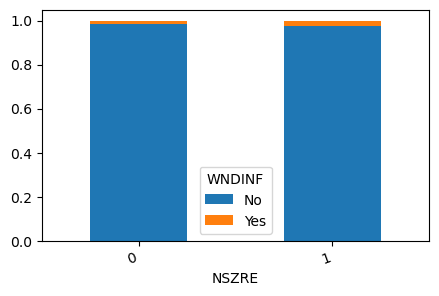

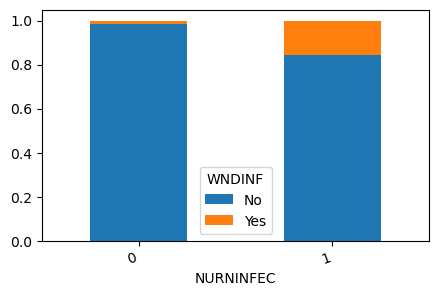

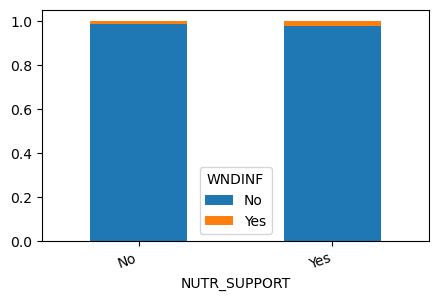

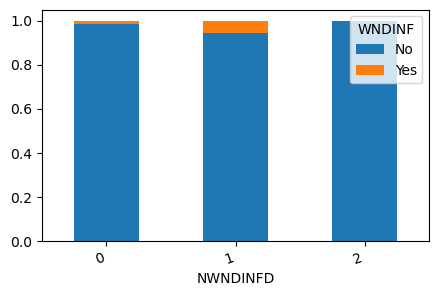

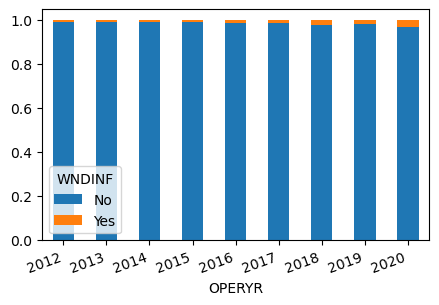

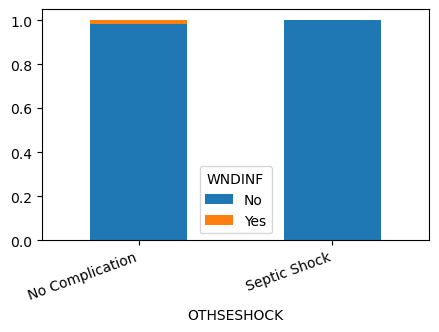

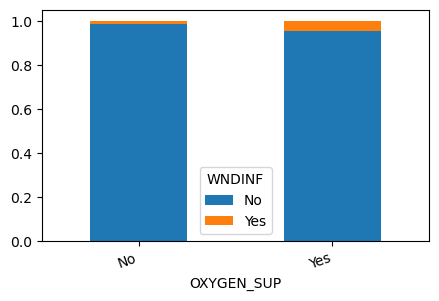

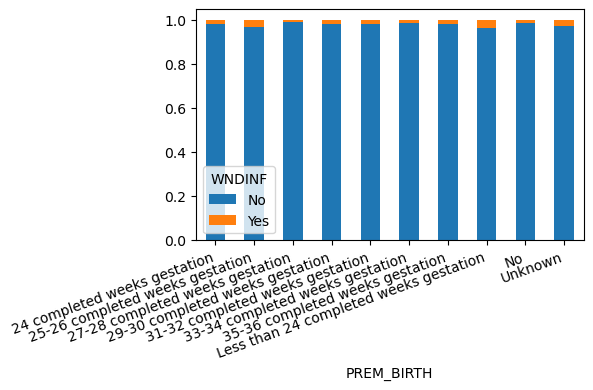

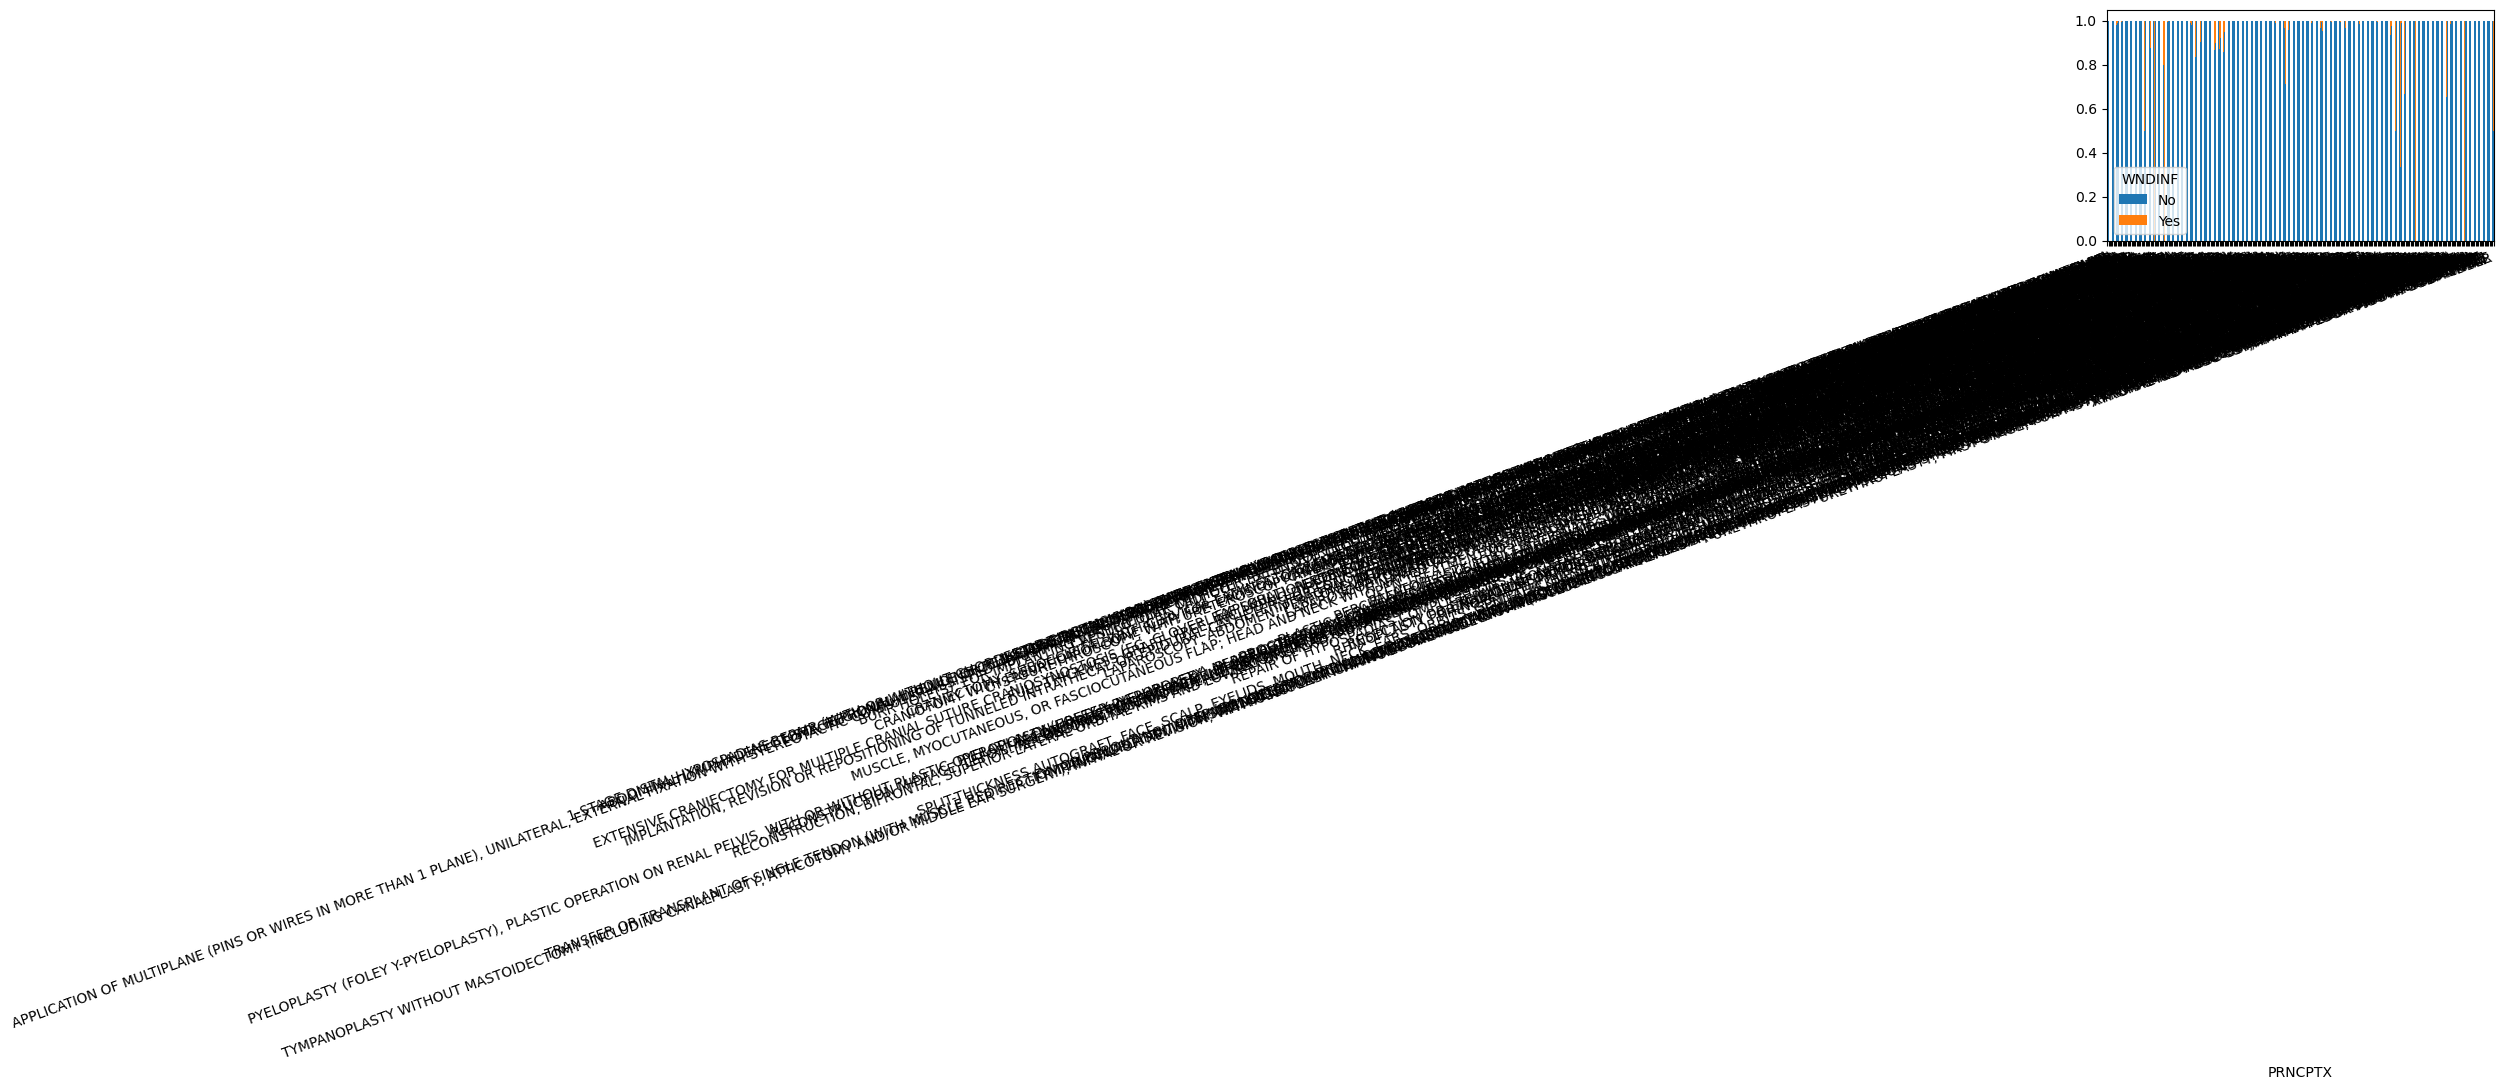

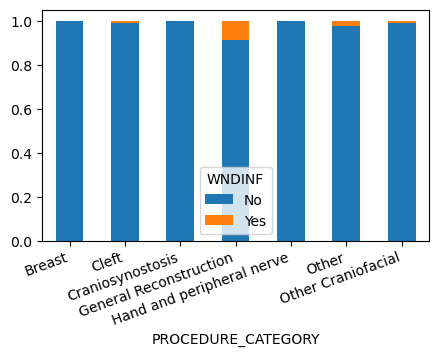

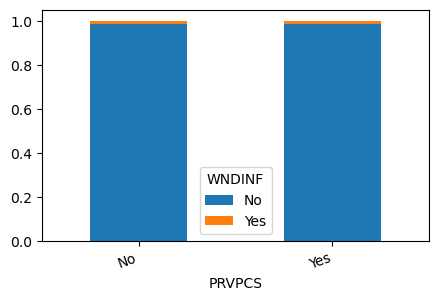

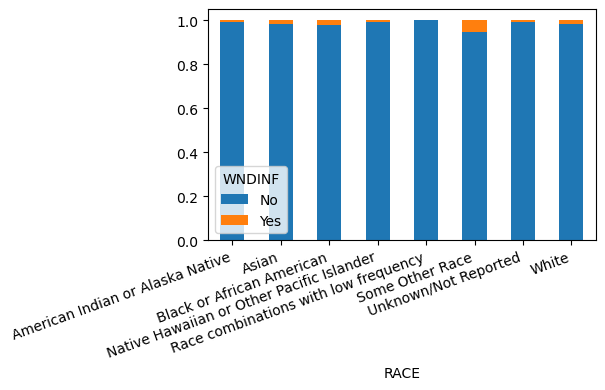

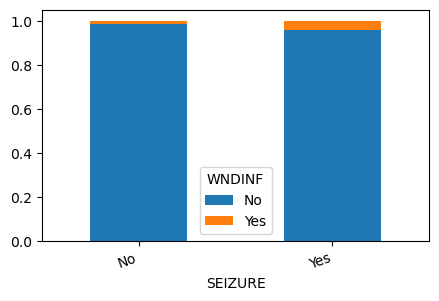

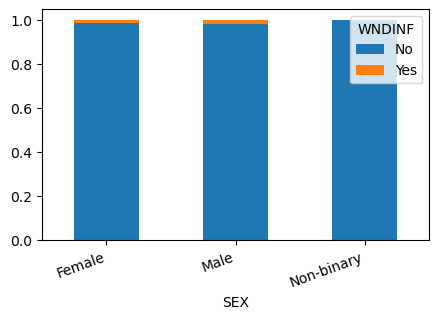

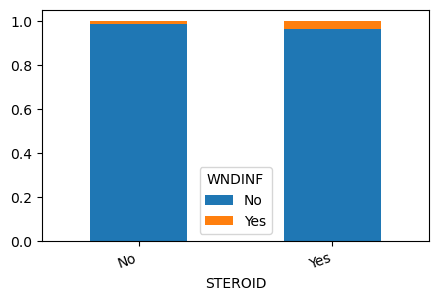

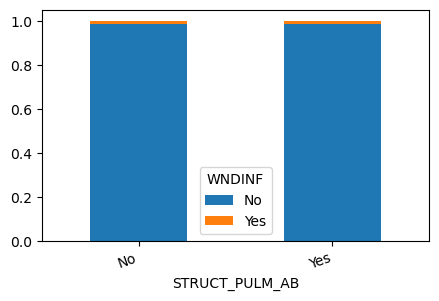

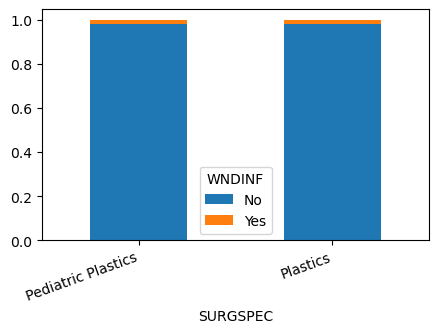

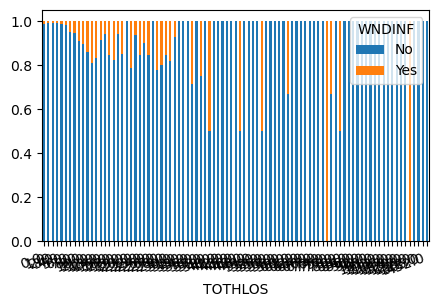

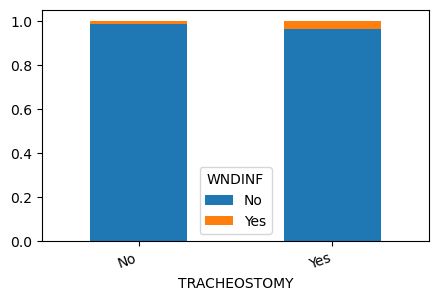

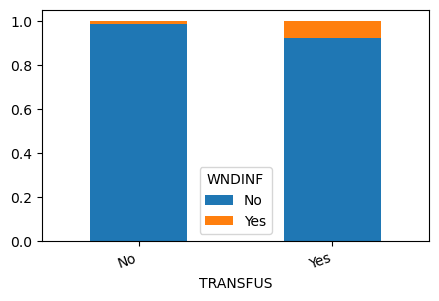

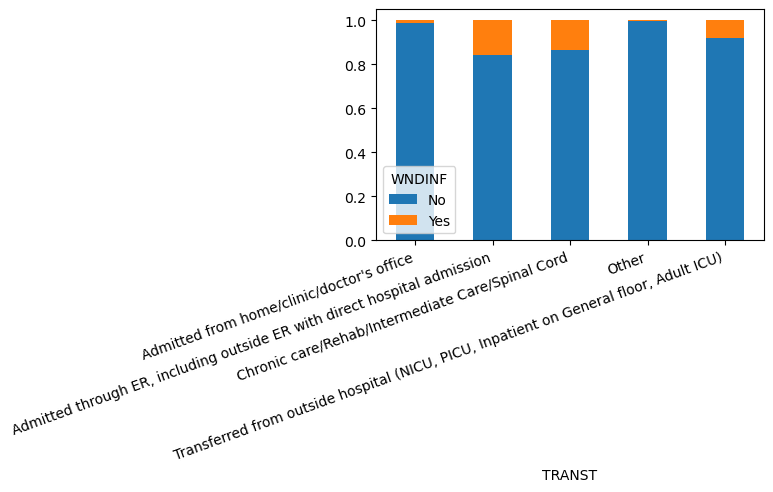

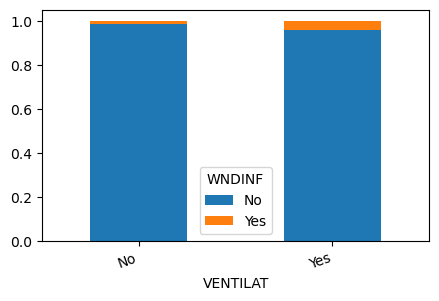

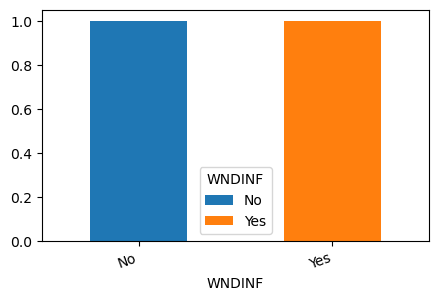

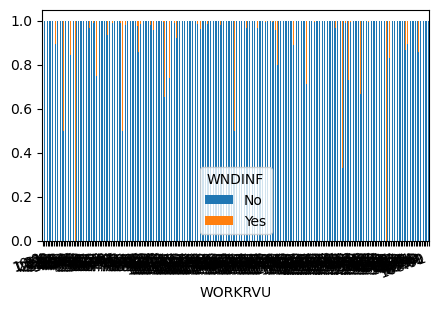

In [174]:
for feature in categorical_features:
    count_matrix = df.groupby([feature, 'WNDINF']).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    count_matrix_norm.plot(kind='bar', stacked=True)
    plt.xlabel(feature)
    plt.xticks(rotation=20, ha='right')
    plt.show()

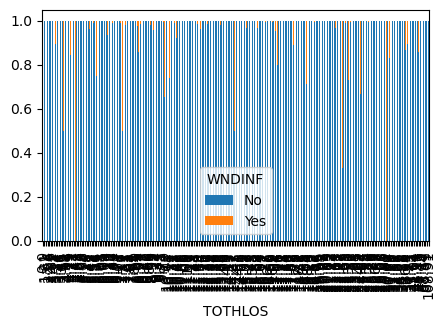

In [153]:
for feature in categorical_features:
    df['age'].plot.hist(bins = df['age'].nunique())
    plt.show()

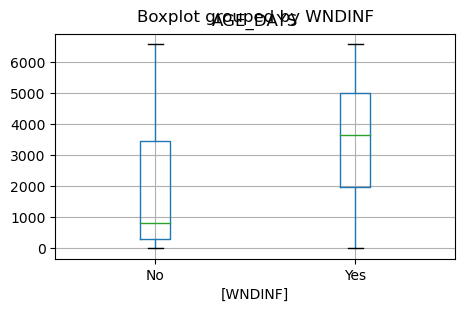

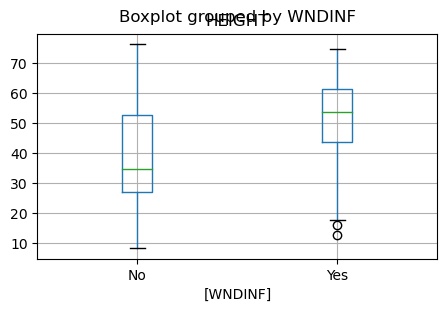

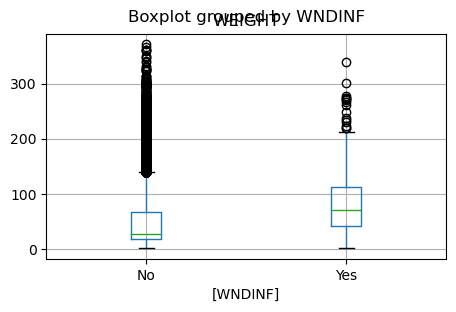

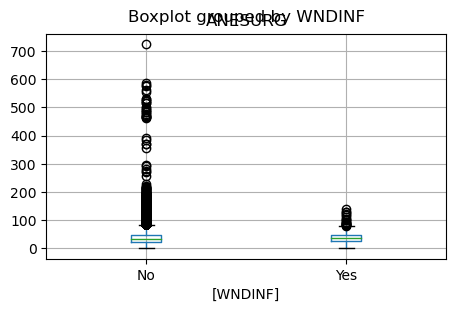

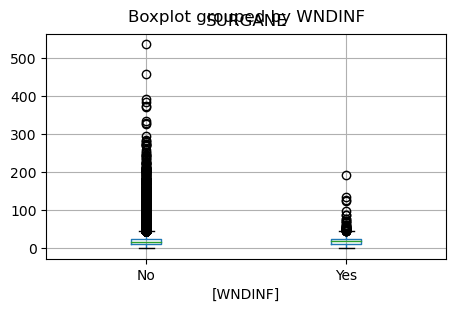

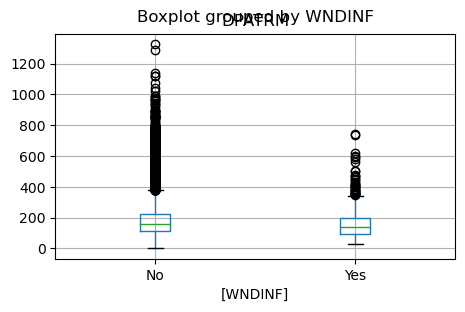

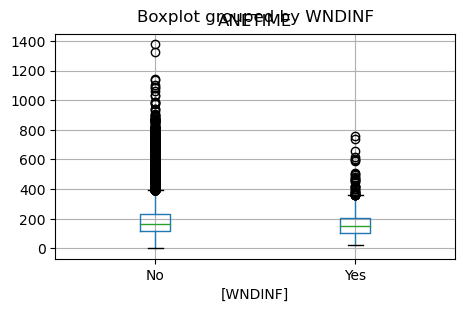

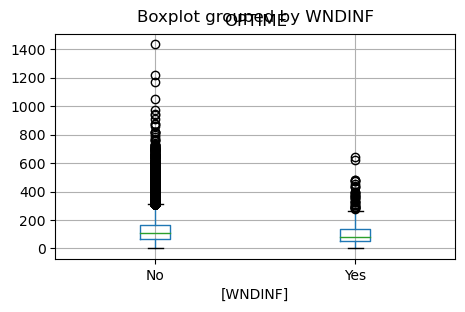

In [161]:
for feature in continuous_features:
    df[[feature,'WNDINF']].boxplot(by='WNDINF')
    plt.show()

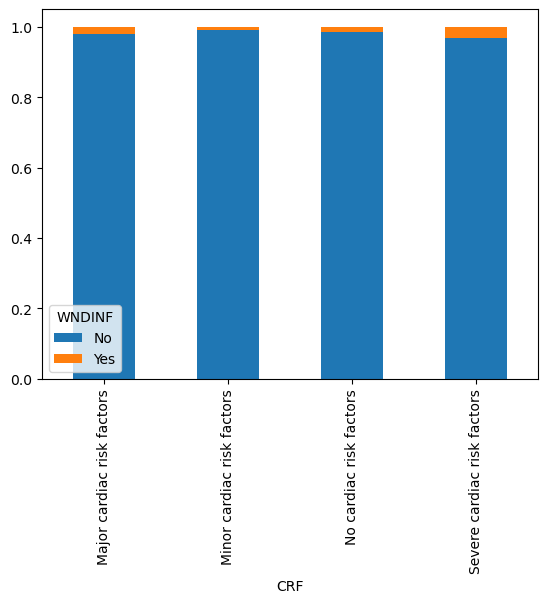

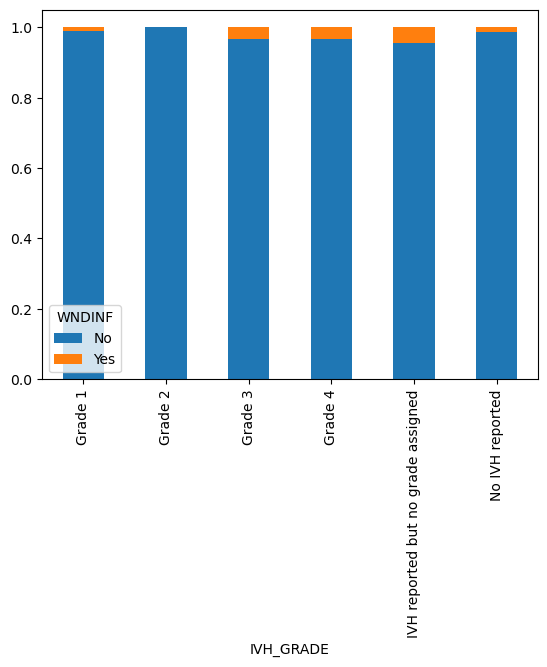

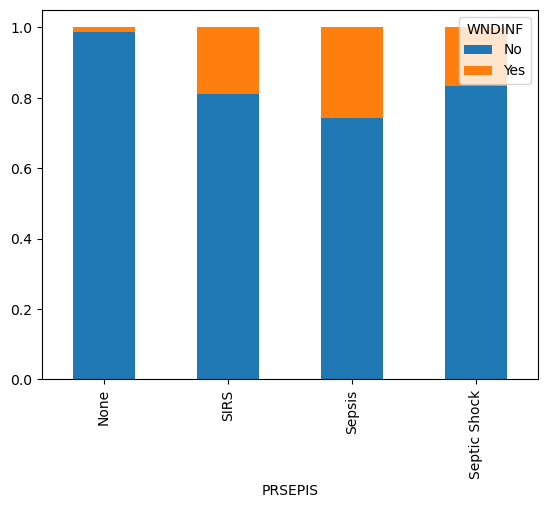

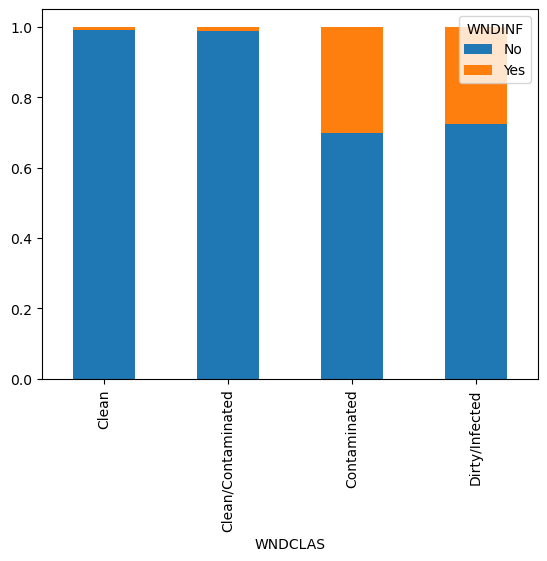

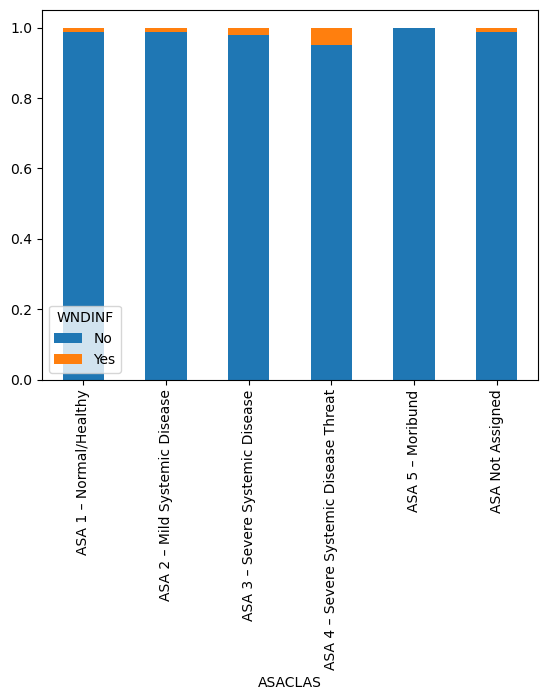

In [113]:
for feature in ordinal_features:
    count_matrix = df.groupby([feature, 'WNDINF']).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    count_matrix_norm.plot(kind='bar', stacked=True)
    plt.xlabel(feature)
    plt.show()

In [114]:
from sklearn.model_selection import train_test_split 

y = df['WNDINF']
X = df.iloc[:, df.columns != 'WNDINF']
train_size = 0.6
val_size = 0.2
test_size = 0.2
random_state = 1

def stratified_split():

    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.8,stratify=y,random_state=0)
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,\
                                                    stratify=y_other,random_state=0)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

split = stratified_split()

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(44345, 80)
(5543, 80)
(5544, 80)


In [ ]:
# https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

total class of 1 and0: No     807
Yes    807
Name: WNDINF, dtype: int64


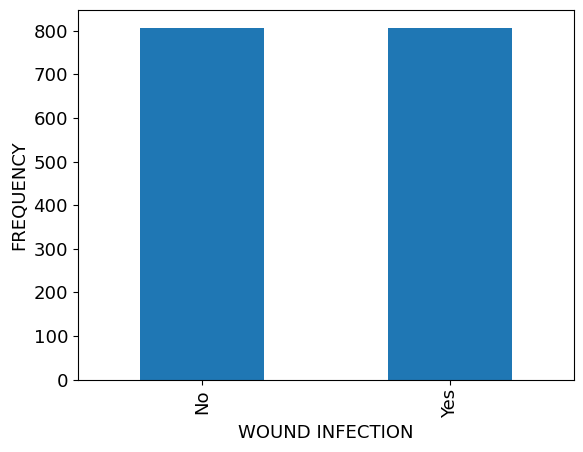

In [327]:
pp = PdfPages('figures/data_balance.pdf')
class_count_0, class_count_1 = df_drop_cont['WNDINF'].value_counts()

class_0 = df_drop_cont[df_drop_cont['WNDINF']=='No']
class_1 = df_drop_cont[df_drop_cont['WNDINF']=='Yes']
# print('class 0:', class_0.shape)
# print('class 1:', class_1.shape)

class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
print("total class of 1 and0:",test_under['WNDINF'].value_counts())# plot the count after under-sampeling
test_under['WNDINF'].value_counts().plot(kind='bar')
plt.ylabel('FREQUENCY')
plt.xlabel('WOUND INFECTION')

pp.savefig(plt.gcf())

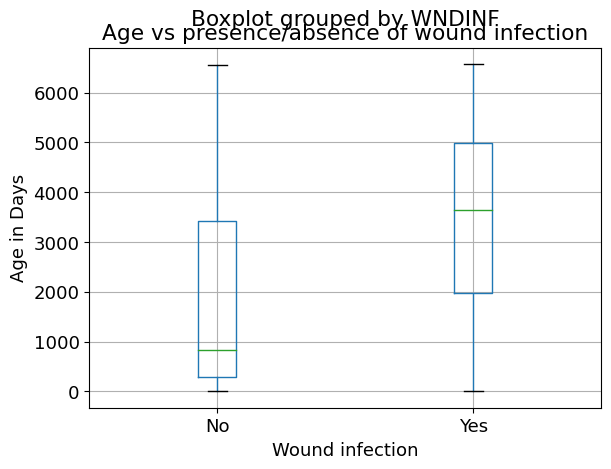

In [328]:
age_df = pd.DataFrame(columns=['AGE_DAYS','WNDINF'])
age_df['AGE_DAYS'] = X_new['AGE_DAYS']
age_df['WNDINF'] = y_new
bplot = age_df[['AGE_DAYS','WNDINF']].boxplot(by='WNDINF')
bplot.set_ylabel('Age in Days')
bplot.set_xlabel('Wound infection')
bplot.set_title('Age vs presence/absence of wound infection')
pp = PdfPages('figures/age.pdf')
pp.savefig(plt.gcf())

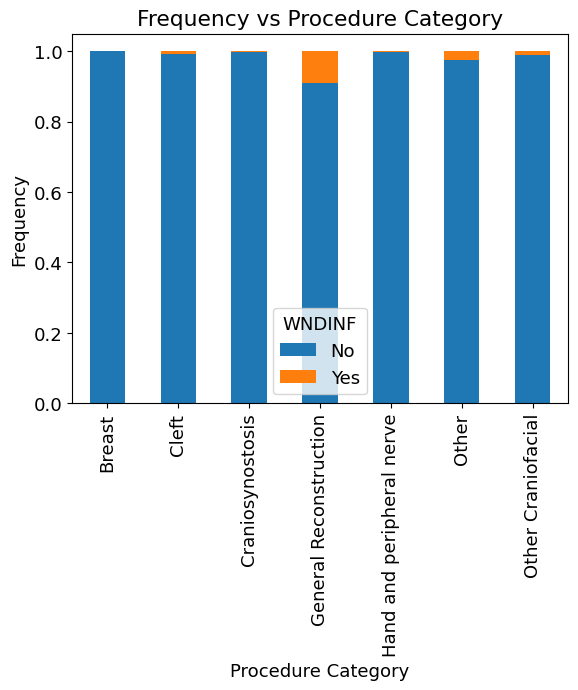

<Figure size 640x480 with 0 Axes>

In [329]:
procedure_count_matrix = df_drop_cont.groupby(['PROCEDURE_CATEGORY', 'WNDINF']).size().unstack()
procedure_count_matrix_norm = procedure_count_matrix.div(procedure_count_matrix.sum(axis=1),axis=0)
procedure_count_matrix_norm.plot(kind='bar', stacked=True)
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.xlabel('Procedure Category')
plt.title('Frequency vs Procedure Category')
plt.show()
pp = PdfPages('figures/procedure_category.pdf')
pp.savefig(plt.gcf())

In [175]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

y_new = test_under['WNDINF']
X_new = test_under.iloc[:, test_under.columns != 'WNDINF']
df_tests = pd.DataFrame()

updated_categorical_features = np.delete(categorical_features, np.where(categorical_features=='WNDINF'))

ordinal_ftrs = ['CRF','IVH_GRADE','PRSEPIS','ASACLAS']
ordinal_cats = [['No cardiac risk factors', 'Minor cardiac risk factors', 'Major cardiac risk factors','Severe cardiac risk factors'],
                ['Grade 1','Grade 2','Grade 3','Grade 4','IVH reported but no grade assigned','No IVH reported'],
                ['None','SIRS','Sepsis','Septic Shock'],
                ['ASA 1 – Normal/Healthy','ASA 2 – Mild Systemic Disease','ASA 3 – Severe Systemic Disease','ASA 4 – Severe Systemic Disease Threat','ASA 5 – Moribund','ASA Not Assigned']]
onehot_ftrs = updated_categorical_features
# minmax_ftrs = continuous_features
minmax_ftrs = ['AGE_DAYS']
std_ftrs = []


preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

In [276]:
def MLpipe_kfold_accuracy(X,y,preprocessor,algo,param_grid):
    nr_states = 3
    test_scores = np.zeros(nr_states)
    final_models = []
    y_true_list = []
    y_pred_list = []
    
    for i in range(nr_states):
        print('STATE:', i)
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42*i)
        kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*i)
        pipe = make_pipeline(preprocessor,algo)
        grid = GridSearchCV(pipe, param_grid=param_grid, scoring='accuracy',
                           cv=kf, return_train_score=True, n_jobs=-1, verbose=True)
        grid.fit(X_train,y_train)
        results = pd.DataFrame(grid.cv_results_)
        print('best model parameters:', grid.best_params_)
        print('validation score:', grid.best_score_)
        final_models.append(grid)
        y_test_pred = final_models[-1].predict(X_test)
        test_scores[i] = accuracy_score(y_test,y_test_pred)
        print('test score:', test_scores[i])
        y_true_list.append(y_test)
        y_pred_list.append(y_test_pred)
    feature_names = grid.best_estimator_[0].get_feature_names_out()
    best_model = grid.best_estimator_
    print('y_train shape:', y_train.shape)
    print('y_test shape:', y_test.shape)
    return grid, best_model, final_models, test_scores, X_test, y_test, y_true_list, y_test_pred, y_pred_list, np.array(feature_names)
    

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
import matplotlib as pyplot

import warnings
warnings. simplefilter(action='ignore', category=FutureWarning)

In [277]:
# RANDOM FOREST CLASSIFIER
param_grid = {
              'randomforestclassifier__max_depth': [1, 3, 10, 30, 100], # the max_depth should be smaller or equal than the number of features roughly
              'randomforestclassifier__max_features': [0.5,0.75,1.0] # linearly spaced between 0.5 and 1
              } 


ML_algo = RandomForestClassifier(random_state = 42)
grid, best_model_output, models, scores, X_new_test, y_true, y_true_array, y_pred, y_pred_array, new_feature_names = MLpipe_kfold_accuracy(X_new, y_new, preprocessor, ML_algo, param_grid)
print('Test Scores', scores)
print('Test Score Mean:', np.mean(scores), 'Test Score Standard Deviation', np.std(scores))
df_tests['RandomForestClassifier'] = scores

STATE: 0
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 1.0}
validation score: 0.8071241082245255
test score: 0.8018575851393189
STATE: 1
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__max_features': 0.75}
validation score: 0.8017181701055709
test score: 0.8173374613003096
STATE: 2
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__max_features': 0.5}
validation score: 0.8133449031786628
test score: 0.8142414860681114
y_train shape: (1291,)
y_test shape: (323,)
Test Scores [0.80185759 0.81733746 0.81424149]
Test Score Mean: 0.8111455108359134 Test Score Standard Deviation 0.006688070896189716


Random Forest confusion matrix


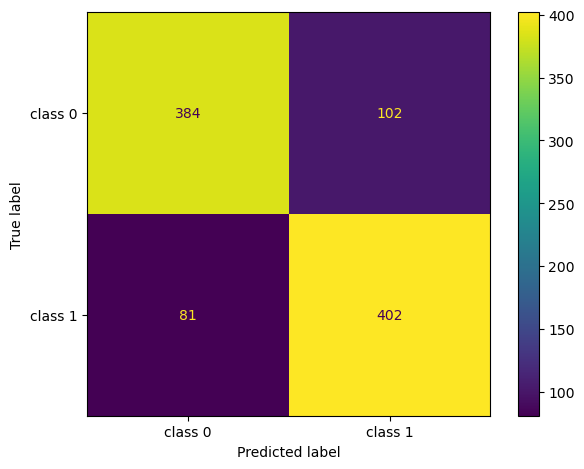

In [187]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_true_concat = list(pd.concat(y_true_array))
y_pred_concat = np.concatenate(y_pred_array)
print('Random Forest confusion matrix')
cm = confusion_matrix(y_true_concat,y_pred_concat)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
disp.plot()
plt.tight_layout()
plt.show()

(323, 489)
(2, 323, 489)


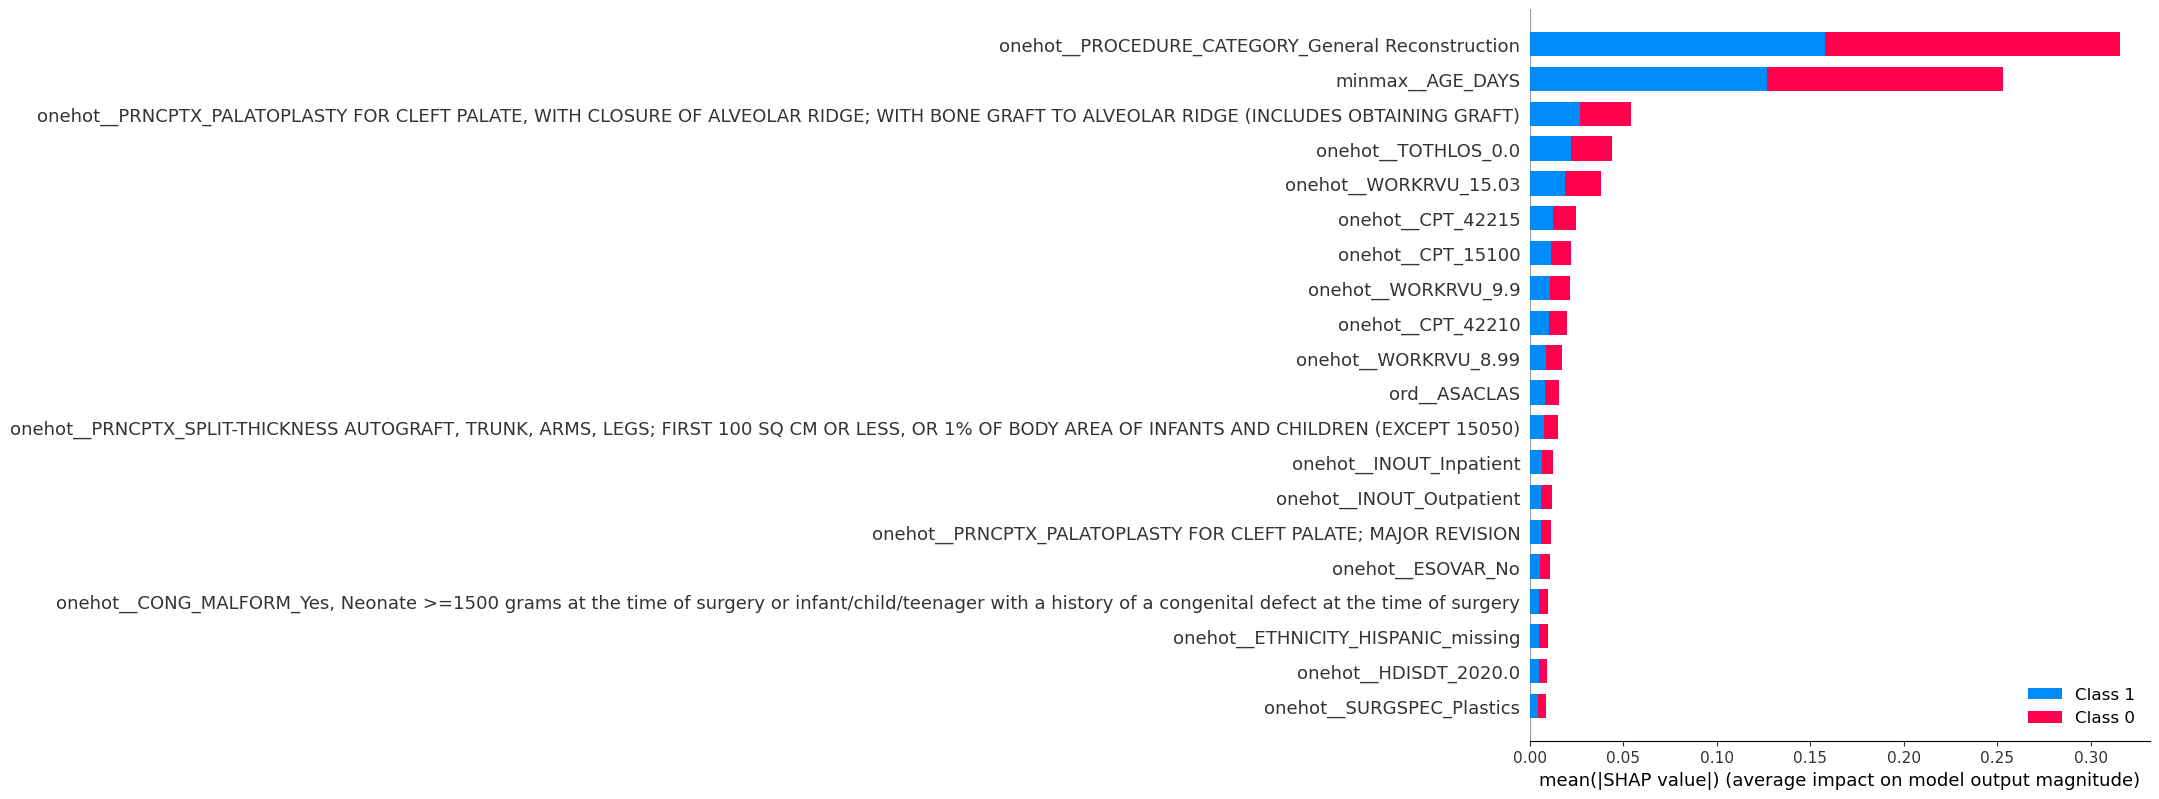

AttributeError: module 'shap' has no attribute 'gcf'

In [330]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(best_model_output[1])
# transform the test set
X_test_transformed = best_model_output[0].transform(X_new_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))
# print(shap_values)
feature_names = best_model_output[0].get_feature_names_out()

shap.summary_plot(shap_values, X_test_transformed[:1000],feature_names = feature_names)

pp = PdfPages('figures/shap.pdf')
pp.savefig(shap.gcf())

In [229]:
print(shap_values)

[array([[-4.70115588e-04, -1.68193738e-04,  7.01555817e-05, ...,
        -3.57442426e-04,  6.36953114e-03, -1.21907984e-01],
       [-3.09150206e-04, -6.91313737e-04,  7.97334841e-05, ...,
         1.26385813e-04,  3.98065865e-03, -2.56534221e-02],
       [ 1.20857615e-04, -8.99546329e-04,  8.16092495e-05, ...,
        -1.96482193e-04,  5.39296554e-03, -7.43144395e-02],
       ...,
       [-3.12211127e-04, -1.07638741e-04,  1.56234387e-04, ...,
         5.60696371e-04,  3.92445617e-03,  3.52691016e-02],
       [-2.56407691e-04, -1.36434840e-04,  1.39413809e-04, ...,
        -9.65784972e-04,  4.36605606e-03, -1.03016614e-01],
       [ 8.86482530e-04, -5.30997908e-05,  2.54278644e-04, ...,
         1.38575291e-03,  7.06063183e-03,  1.71005679e-01]]), array([[ 4.70115588e-04,  1.68193738e-04, -7.01555817e-05, ...,
         3.57442426e-04, -6.36953114e-03,  1.21907984e-01],
       [ 3.09150206e-04,  6.91313737e-04, -7.97334841e-05, ...,
        -1.26385813e-04, -3.98065865e-03,  2.56534221

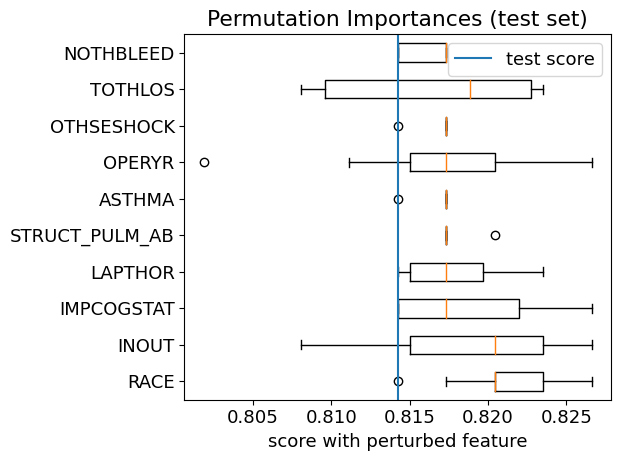

<Figure size 640x480 with 0 Axes>

In [331]:
import warnings
warnings. simplefilter(action='ignore', category=FutureWarning)
np.random.seed(42)

original_feature_names = X_new_test.columns

nr_runs = 10
scores = np.zeros([len(original_feature_names),nr_runs])

test_score = grid.score(X_new_test,y_true)
# print('test score = ',test_score)
# loop through the features
for i in range(len(original_feature_names)):
    # print('shuffling '+str(feature_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_new_test.copy()
        X_test_shuffled[original_feature_names[i]] = np.random.permutation(X_new_test[original_feature_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_true))
    # print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
top_ten = sorted_indcs[0:10]
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(6.4,4.8))
plt.boxplot(scores[top_ten].T,labels=original_feature_names[top_ten],vert=False)
#plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

pp = PdfPages('figures/permutation.pdf')
pp.savefig(plt.gcf())

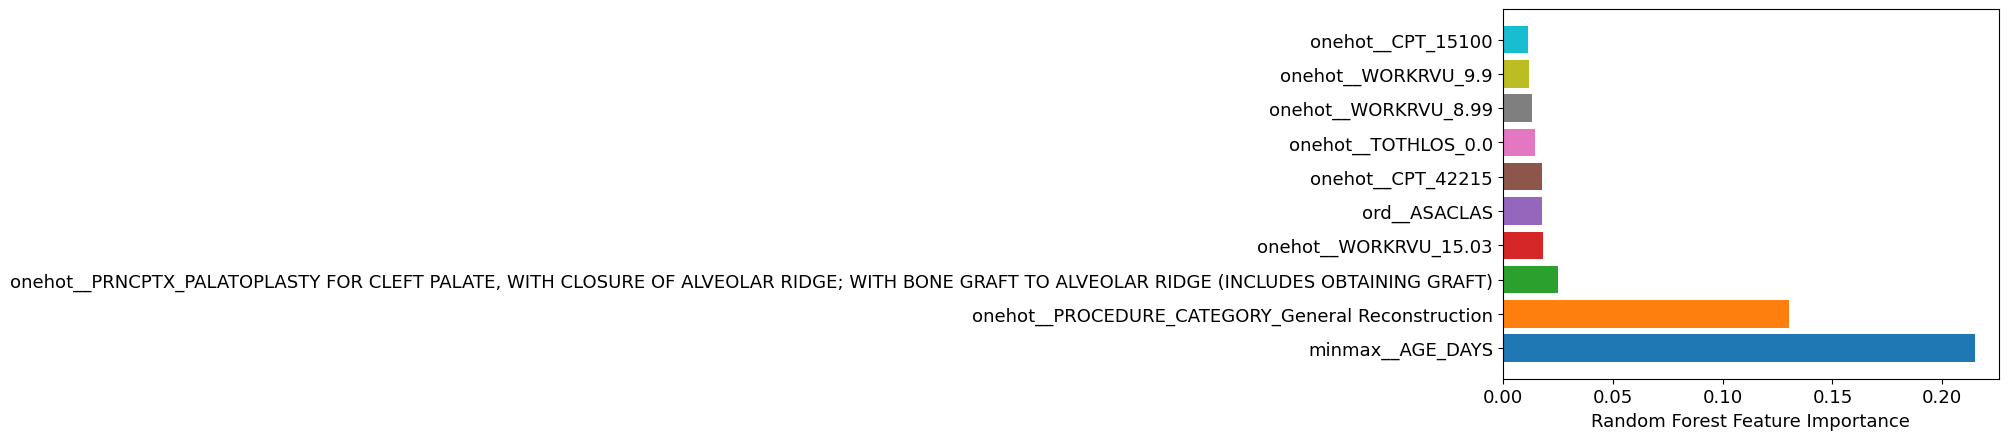

<Figure size 640x480 with 0 Axes>

In [332]:
gini_importances = best_model_output[1].feature_importances_
sorted_idx = np.argsort(gini_importances)[::-1][:10]
top_ten = sorted_idx[0:10]
for index in top_ten:
    plt.barh(feature_names[index], gini_importances[index])
plt.xlabel('Random Forest Feature Importance')
plt.show()

pp = PdfPages('figures/Gini_values.pdf')
pp.savefig(plt.gcf())

In [333]:
index = 0 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

pp = PdfPages('figures/force_class_0.pdf')
pp.savefig(plt.gcf())

0.49892331525948885


<Figure size 640x480 with 0 Axes>

In [334]:
index = 3 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)
pp = PdfPages('figures/force_class_1.pdf')
pp.savefig(plt.gcf())

0.49892331525948885


<Figure size 640x480 with 0 Axes>

In [178]:
#SVC CLASSIFIER
param_grid = {
    'svc__gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
    'svc__C': [1e-1, 1e0, 1e1]
}
ML_algo = SVC(probability=True, random_state = 0)
models, scores, X_new_test, y_true, y_true_array, y_pred, y_pred_array, new_feature_names = MLpipe_kfold_accuracy(X_new, y_new, preprocessor, ML_algo, param_grid)
print('Test Scores', scores)
print('Test Score Mean:', np.mean(scores), 'Test Score Standard Deviation', np.std(scores))
df_tests['SVC'] = scores

STATE: 0
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'svc__C': 10.0, 'svc__gamma': 0.001}
validation score: 0.79859575409111
test score: 0.8142414860681114
STATE: 1
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'svc__C': 10.0, 'svc__gamma': 0.001}
validation score: 0.8040353441147626
test score: 0.8018575851393189
STATE: 2
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.1}
validation score: 0.81720044997404
test score: 0.8080495356037152
Test Scores [0.81424149 0.80185759 0.80804954]
Test Score Mean: 0.8080495356037152 Test Score Standard Deviation 0.005055706383453379


SVC confusion matrix


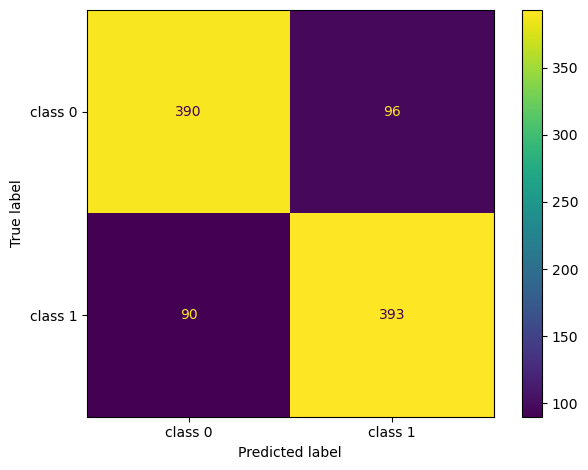

In [179]:
# SVC CONFUSION MATRIX

y_true_concat = list(pd.concat(y_true_array))
y_pred_concat = np.concatenate(y_pred_array)
print('SVC confusion matrix')
cm = confusion_matrix(y_true_concat,y_pred_concat)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
disp.plot()
plt.tight_layout()
plt.show()

In [190]:
# K NEAREST NEIGHBOR CLASSIFICATION
import warnings
warnings. simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7]
}
ML_algo = KNeighborsClassifier()
models, scores, X_new_test, y_true, y_true_array, y_pred, y_pred_array, new_feature_names = MLpipe_kfold_accuracy(X_new, y_new, preprocessor, ML_algo, param_grid)
print('Test Scores', scores)
print('Test Score Mean:', np.mean(scores), 'Test Score Standard Deviation', np.std(scores))
df_tests['KNearestNeighbors'] = scores

STATE: 0
Fitting 4 folds for each of 7 candidates, totalling 28 fits


/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

best model parameters: {'kneighborsclassifier__n_neighbors': 7}
validation score: 0.7668331634713382
test score: 0.7708978328173375
STATE: 1
Fitting 4 folds for each of 7 candidates, totalling 28 fits


/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

best model parameters: {'kneighborsclassifier__n_neighbors': 7}
validation score: 0.7792386977674365
test score: 0.7678018575851393
STATE: 2
Fitting 4 folds for each of 7 candidates, totalling 28 fits


/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

best model parameters: {'kneighborsclassifier__n_neighbors': 7}
validation score: 0.7815751014364556
test score: 0.7492260061919505
Test Scores [0.77089783 0.76780186 0.74922601]
Test Score Mean: 0.762641898864809 Test Score Standard Deviation 0.009570297724969774


Random Forest confusion matrix


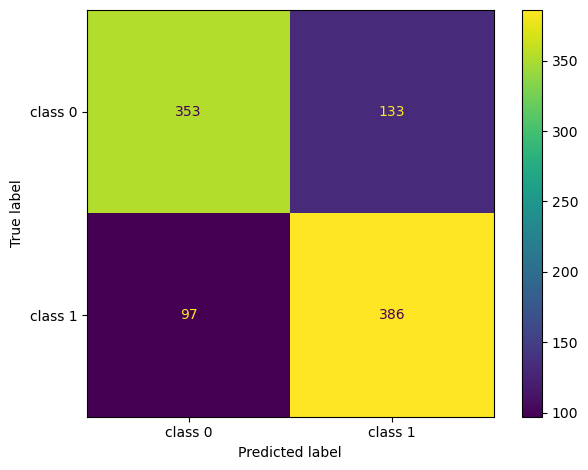

In [181]:
# K NEAREST NEIGHBOR CONFUSION MATRIX

y_true_concat = list(pd.concat(y_true_array))
y_pred_concat = np.concatenate(y_pred_array)
print('Random Forest confusion matrix')
cm = confusion_matrix(y_true_concat,y_pred_concat)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
disp.plot()
plt.tight_layout()
plt.show()

In [182]:
# LOGISTIC REGRESSION
param_grid = {
    'logisticregression__C': [1e-1, 1e0, 1e1]
}
ML_algo = LogisticRegression()
models, scores, X_new_test, y_true, y_true_array, y_pred, y_pred_array, new_feature_names = MLpipe_kfold_accuracy(X_new, y_new, preprocessor, ML_algo, param_grid)
print('Test Scores', scores)
print('Test Score Mean:', np.mean(scores), 'Test Score Standard Deviation', np.std(scores))
df_tests['LogisticRegression'] = scores

STATE: 0
Fitting 4 folds for each of 3 candidates, totalling 12 fits


/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

best model parameters: {'logisticregression__C': 1.0}
validation score: 0.7939421764128993
test score: 0.7925696594427245
STATE: 1
Fitting 4 folds for each of 3 candidates, totalling 12 fits


/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

best model parameters: {'logisticregression__C': 0.1}
validation score: 0.7962857912043536
test score: 0.7925696594427245
STATE: 2
Fitting 4 folds for each of 3 candidates, totalling 12 fits


/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nicksawicki/opt/anaconda3/envs/d1030/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

best model parameters: {'logisticregression__C': 0.1}
validation score: 0.8055881391458186
test score: 0.804953560371517
Test Scores [0.79256966 0.79256966 0.80495356]
Test Score Mean: 0.7966976264189887 Test Score Standard Deviation 0.005837826882861036


Random Forest confusion matrix


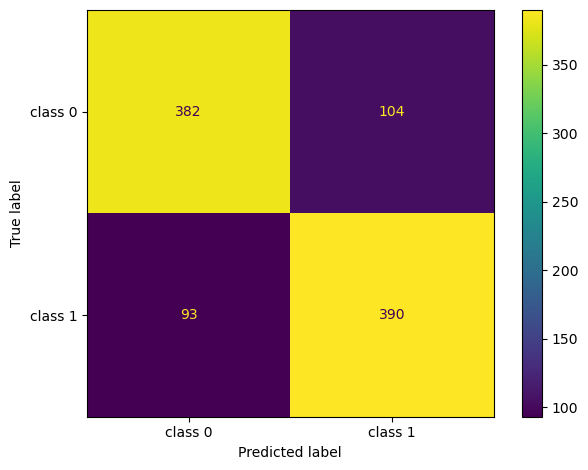

In [183]:
# LOGISTIC REGRESSION CONFUSION MATRIX

y_true_concat = list(pd.concat(y_true_array))
y_pred_concat = np.concatenate(y_pred_array)
print('Random Forest confusion matrix')
cm = confusion_matrix(y_true_concat,y_pred_concat)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
disp.plot()
plt.tight_layout()
plt.show()

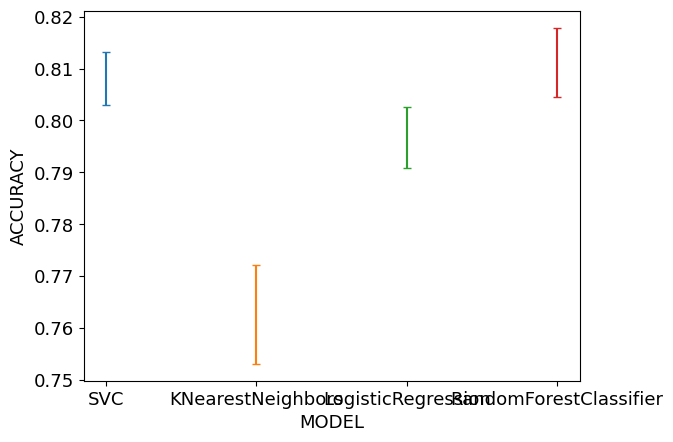

In [323]:
# TEST PLOT
baseline_score = 0.5
for feature in df_tests.columns:
    plt.errorbar(feature, np.mean(df_tests[feature]),yerr=np.std(df_tests[feature]),capsize=3)

plt.xlabel('MODEL')
plt.ylabel('ACCURACY')
plt.show()